Dataset Details: This Netflix Stock Prices dataset consists of the following attributes [“high”, “low”, “volume”, “adj_close”, “close”]

Objective: To develop a predictive model using historical data of Netflix’s stock prices, with the aim of accurately forecasting future prices based on a range of key attributes including low, volume, adj close, high & close. The main purpose of this project is to build a machine learning model that can predict Netflix’s stock prices in the future. I will be specifically using the Time-Series Analysis to make a prediction of the stock prices.

Hypothesis to prove/disprove: The historical data of Netflix’s stock prices indicates a significant correlation between the low, volume, adj close, high & close attributes. Therefore, it is possible to develop a machine learning model that accurately predicts future stock prices based on these attributes. Basically, this hypothesis statement outlines the belief that these attributes have a strong influence on the stock price and that a machine learning model can be developed to leverage this relationship to accurately predict the future Netflix stock prices.

In [1]:
# Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# Import the dataset
df = pd.read_csv('C:\\Rohan\\Sharpest Minds Platform\\NFLX.csv')

## Understanding the data

In [101]:
# Obtain the first 10 rows of this dataset
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [102]:
# Obtain the last 10 rows of this dataset
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
999,2022-01-24,383.910004,387.260010,351.459991,387.149994,387.149994,32346000
1000,2022-01-25,379.140015,387.709991,365.130005,366.420013,366.420013,15145800
1001,2022-01-26,378.269989,382.660004,356.619995,359.700012,359.700012,12684000
1002,2022-01-27,382.059998,394.799988,378.100006,386.700012,386.700012,24324700
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [103]:
# Obtain all the attributes of this dataset
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

By looking at the dataframe, there are 7 variables involved in the Netflix's stock raw dataset.

Variables:

Date: Everyday Netflix stock price

Open: Price at which Netflix stock is opened

High: The highest price at which Netflix stock traded during the trading day

Low: The lowest price at which Netflix stock trades over a trading day

Close: The last price at which Netflix stock trades during a trading day

Adj Close: The closing price of Netflix stock after paying off dividends and/or capital gain distributions

Volume: Volume of stock traded during a trading day

In [104]:
# Obtain the dimesnions of this dataset
df.shape

(1009, 7)

This dataset has about 1009 rows and 7 attributes

In [105]:
# Obtain the data types for each of the attributes
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [106]:
# Obtain more info for each of the attributes in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


This output is the summary information of a pandas DataFrame, which is a tabular data structure in Python commonly used for data analysis and manipulation. Let's break down the information in simple words:

"RangeIndex: 1009 entries, 0 to 1008": This tells us that the DataFrame has 1009 rows or entries, ranging from 0 to 1008. This indicates the number of observations or data points in the DataFrame.

"Data columns (total 7 columns)": This indicates that the DataFrame has a total of 7 columns or variables.

"Column Non-Null Count Dtype": This section provides information about each column in the DataFrame:

"Date" column: It has 1009 non-null entries, meaning there are no missing values in this column. The data type of this column is "object," which typically represents strings or other non-numeric data.

"Open," "High," "Low," "Close," and "Adj Close" columns: Each of these columns has 1009 non-null entries, indicating that there are no missing values. The data type of these columns is "float64," representing floating-point or decimal numbers.

"Volume" column: It has 1009 non-null entries, indicating no missing values. The data type of this column is "int64," representing integers.

"memory usage: 55.3+ KB": This indicates the memory usage of the DataFrame, which is approximately 55.3 kilobytes. It provides an estimate of the memory required to store the DataFrame in the computer's memory.

Overall, this output gives an overview of the DataFrame's structure, including the number of rows, columns, data types, and memory usage.

Almost all of the data types are numeric and are of the type "float" while volume is of the type "int". The attribute "Date" is the only one that is not numeric. We will be converting this attribute to "datetime" format to make it much simpler for analysis.

In [89]:
# Convert the attribute "date" to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

## Data Cleaning

Data cleaning, also known as data cleansing or data preprocessing, refers to the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. It involves transforming raw data into a clean and consistent format that is suitable for analysis or modeling.

The importance of data cleaning lies in the fact that real-world data is often messy and contains various issues that can adversely affect the quality and reliability of analysis or machine learning models. Here are some key reasons why data cleaning is crucial:

Improving accuracy: Data cleaning helps to improve the accuracy of analysis and modeling results. By identifying and rectifying errors, outliers, and inconsistencies, it ensures that the data used for analysis or modeling is reliable and accurate.

Enhancing data quality: Clean data ensures high-quality information for decision-making processes. Removing duplicate records, correcting misspellings, standardizing formats, and handling missing values can significantly enhance the quality and completeness of the dataset.

Facilitating meaningful analysis: Data cleaning makes the data more suitable for analysis by addressing issues such as missing values, inconsistent formatting, and outliers. It enables analysts and researchers to derive meaningful insights, identify patterns, and make reliable conclusions based on the data.

Avoiding biased or skewed results: Flawed or uncleaned data can introduce biases or skewness into analysis or modeling results. By carefully cleaning the data, researchers can minimize the impact of bias, ensure fairness, and obtain unbiased insights.

Enhancing efficiency: Clean and well-prepared data reduces the time and effort required for subsequent analysis, modeling, and interpretation. It streamlines the data preparation process and enables analysts to focus on extracting insights rather than dealing with data issues.

Maintaining data integrity: Data cleaning helps to ensure the integrity and consistency of the dataset. By enforcing data validation rules, identifying and resolving inconsistencies, and establishing data quality checks, it safeguards the reliability and trustworthiness of the data.

Overall, data cleaning is a critical step in the data analysis pipeline. It ensures that data is accurate, reliable, and ready for analysis or modeling, leading to more robust and trustworthy results.







In [107]:
# Obtain the total number of missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [108]:
# Obtain the total number of duplicate records
duplicate_rows = df.duplicated()
total_duplicates = duplicate_rows.sum()
total_duplicates

0

We can observe that this dataset has no missing values nor it has any duplicate values.

C:\Users\rohan\AppData\Local\Temp\ipykernel_9608\3677582431.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


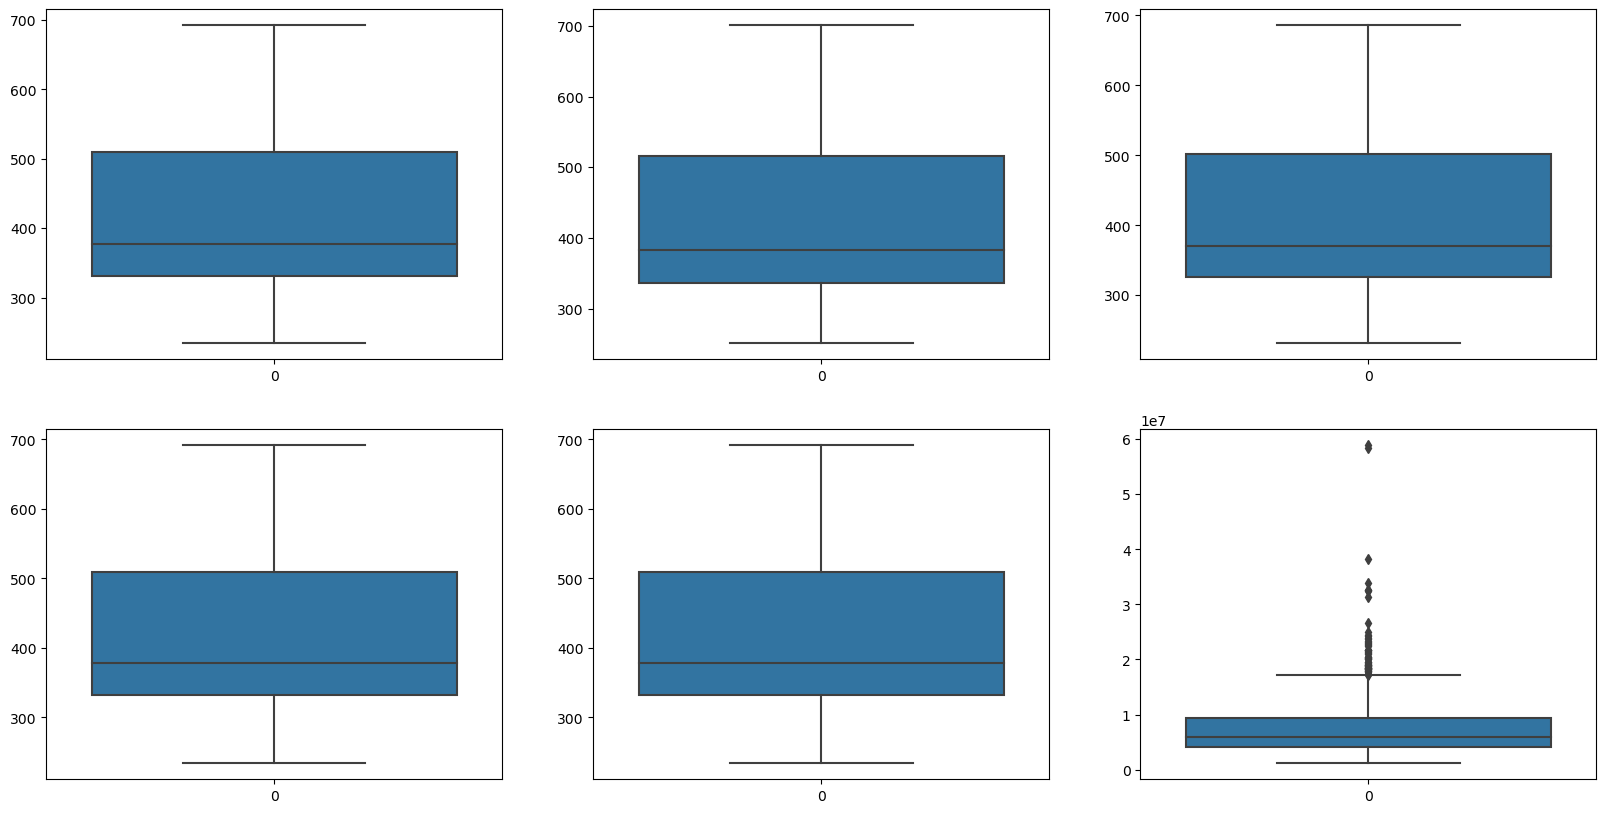

In [12]:
# Detect the number of outliers existing for each of the attributes using the boxplot method
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

From the boxplots above, we can see that there are no outliers existing for any of the attributes except that of the attribute "Volume" which has a couple of outliers.

## Data Summary

Obtaining summary statistics of a DataFrame is essential for gaining an understanding of the underlying data and extracting meaningful insights. Here are some reasons highlighting the importance of summary statistics:

Descriptive overview: Summary statistics provide a concise and descriptive overview of the dataset. They include measures such as mean, median, mode, minimum, maximum, standard deviation, and quartiles. These statistics offer a snapshot of the central tendency, spread, and distribution of the data, allowing analysts to quickly assess its characteristics.

Data validation: Summary statistics help in validating the data. By examining the minimum and maximum values, analysts can check for outliers, erroneous entries, or data entry errors. Unusual values can be identified and investigated further to ensure data accuracy and quality.

Identifying data patterns: Summary statistics assist in identifying patterns and relationships within the dataset. Measures like mean and standard deviation provide insights into the central tendency and variability of the data. They help determine if the data is normally distributed or skewed, and whether there are any distinct clusters or trends present.

Comparisons and benchmarks: Summary statistics enable comparisons between different variables or subsets of the data. Analysts can compare means, medians, or other measures across groups to identify differences, similarities, or trends. These comparisons can be used to establish benchmarks or performance indicators for further analysis or decision-making.

Data-driven decision making: Summary statistics provide a foundation for data-driven decision-making processes. By understanding the characteristics of the data, decision-makers can assess risks, set realistic goals, and make informed choices based on the available information. Summary statistics offer insights into the data that can support strategic planning, resource allocation, and performance evaluation.

Communicating findings: Summary statistics serve as a means to communicate findings and insights to stakeholders or team members. They provide a concise summary of the data, making it easier to convey key information and support data-driven arguments or recommendations.

Overall, summary statistics play a crucial role in understanding and interpreting data. They provide a foundation for further analysis, decision making, and effective communication of findings. By summarizing the key characteristics of the data, they enable analysts and decision-makers to extract meaningful insights and make informed choices.






In [13]:
# Obtain the descriptive statistics for this dataframe
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


"count": This tells us the number of data points available for each column. In this case, there are 1009 data points for all columns, indicating that there are no missing values.

"mean": The mean represents the average value of each column. For example, the mean Open price is approximately 419.06, which indicates that, on average, the stock opened at around that price during the given period.

"std": The standard deviation measures the dispersion or variability of the data around the mean. A higher standard deviation indicates greater variability. For instance, the std (standard deviation) for the Open price is approximately 108.54, indicating that the opening prices varied quite a bit from the average.

"min" and "max": These represent the minimum and maximum values observed in each column. For instance, the minimum value for the Open price is approximately 233.92, while the maximum value is around 692.35.

"25%", "50%", and "75%": These are the quartiles of the data, which divide the dataset into four equal parts. The 25th percentile (Q1) is the value below which 25% of the data falls, the 50th percentile (Q2) is the median, and the 75th percentile (Q3) is the value below which 75% of the data falls. These quartiles provide insights into the distribution of the data. For example, the 25th percentile for the Open price is approximately 331.49, indicating that 25% of the opening prices are below this value.

In summary, these descriptive statistics provide a basic understanding of the dataset's central tendency, variability, and distribution. They convey information about the average, spread, and extreme values of each column, helping to gain insights into the data's overall characteristics.

In [14]:
# Extract day, month, and year components from the attribute "date" and add these 3 columns into this dataframe
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [15]:
# Create five new columns. 
# We are trying to extract "week", "month", "quarter", "year" & "day" components from the attribute "date"
df['week'] = df['Date'].dt.strftime('%Y-W%V')
df['month'] = df['Date'].dt.strftime('%Y-%m')
df['quarter'] = df['Date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['Date'].dt.strftime('%Y')
df['Day'] = df['Date'].dt.day

In [16]:
# Obtain the first 10 rows of this dataframe to check if these columns have been added
df['quarter_number'] = df['quarter'].str.replace('\d{4}-', 'Q', regex=True)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,week,month,quarter,year,quarter_number
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018,2018-W06,2018-02,2018-Q1,2018,QQ1
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018,2018-W06,2018-02,2018-Q1,2018,QQ1
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018,2018-W06,2018-02,2018-Q1,2018,QQ1
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018,2018-W06,2018-02,2018-Q1,2018,QQ1
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018,2018-W06,2018-02,2018-Q1,2018,QQ1
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,12,2,2018,2018-W07,2018-02,2018-Q1,2018,QQ1
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,13,2,2018,2018-W07,2018-02,2018-Q1,2018,QQ1
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000,14,2,2018,2018-W07,2018-02,2018-Q1,2018,QQ1
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700,15,2,2018,2018-W07,2018-02,2018-Q1,2018,QQ1
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400,16,2,2018,2018-W07,2018-02,2018-Q1,2018,QQ1


In [17]:
# Drop the attribute "Year"
df = df.drop({'Year'}, axis = 1)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,week,month,quarter,year,quarter_number
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018-W06,2018-02,2018-Q1,2018,QQ1
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018-W06,2018-02,2018-Q1,2018,QQ1
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018-W06,2018-02,2018-Q1,2018,QQ1
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018-W06,2018-02,2018-Q1,2018,QQ1
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018-W06,2018-02,2018-Q1,2018,QQ1
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,12,2,2018-W07,2018-02,2018-Q1,2018,QQ1
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,13,2,2018-W07,2018-02,2018-Q1,2018,QQ1
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000,14,2,2018-W07,2018-02,2018-Q1,2018,QQ1
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700,15,2,2018-W07,2018-02,2018-Q1,2018,QQ1
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400,16,2,2018-W07,2018-02,2018-Q1,2018,QQ1


In [18]:
# Drop the attribute 'month' as well
df = df.drop({'month'}, axis = 1)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,week,quarter,year,quarter_number
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018-W06,2018-Q1,2018,QQ1
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018-W06,2018-Q1,2018,QQ1
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018-W06,2018-Q1,2018,QQ1
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018-W06,2018-Q1,2018,QQ1
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018-W06,2018-Q1,2018,QQ1
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,12,2,2018-W07,2018-Q1,2018,QQ1
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,13,2,2018-W07,2018-Q1,2018,QQ1
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000,14,2,2018-W07,2018-Q1,2018,QQ1
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700,15,2,2018-W07,2018-Q1,2018,QQ1
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400,16,2,2018-W07,2018-Q1,2018,QQ1


In [19]:
# Let us convert the values for the attribute "day" to days of the week, "month" to names of the month
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,week,quarter,year,quarter_number
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,Monday,February,2018-W06,2018-Q1,2018,QQ1
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,Tuesday,February,2018-W06,2018-Q1,2018,QQ1
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,Wednesday,February,2018-W06,2018-Q1,2018,QQ1
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,Thursday,February,2018-W06,2018-Q1,2018,QQ1
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,Friday,February,2018-W06,2018-Q1,2018,QQ1
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,Monday,February,2018-W07,2018-Q1,2018,QQ1
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,Tuesday,February,2018-W07,2018-Q1,2018,QQ1
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000,Wednesday,February,2018-W07,2018-Q1,2018,QQ1
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700,Thursday,February,2018-W07,2018-Q1,2018,QQ1
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400,Friday,February,2018-W07,2018-Q1,2018,QQ1


In [20]:
# Rename certain attributes
df = df.rename({'week': 'Week'}, axis = 1)
df = df.rename({'quarter':'Quarter'}, axis = 1)
df = df.rename({'year':'Year'}, axis = 1)
df = df.rename({'quarter_number':'Quarter_Number'}, axis = 1)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Week,Quarter,Year,Quarter_Number
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,Monday,February,2018-W06,2018-Q1,2018,QQ1
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,Tuesday,February,2018-W06,2018-Q1,2018,QQ1
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,Wednesday,February,2018-W06,2018-Q1,2018,QQ1
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,Thursday,February,2018-W06,2018-Q1,2018,QQ1
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,Friday,February,2018-W06,2018-Q1,2018,QQ1
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,Monday,February,2018-W07,2018-Q1,2018,QQ1
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,Tuesday,February,2018-W07,2018-Q1,2018,QQ1
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000,Wednesday,February,2018-W07,2018-Q1,2018,QQ1
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700,Thursday,February,2018-W07,2018-Q1,2018,QQ1
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400,Friday,February,2018-W07,2018-Q1,2018,QQ1


In [21]:
# Obtain the descriptive statistics grouped by the day, month & year
# Convert the "Year" column data type to object
statistics = df.groupby(['Day', 'Month', 'Year', 'Quarter']).describe()

# Display the statistics
print(statistics)

                                  Open                                     \
                                 count        mean        std         min   
Day       Month     Year Quarter                                            
Friday    April     2018 2018-Q2   4.0  313.715004  17.958655  289.100006   
                    2019 2019-Q2   3.0  366.013336   4.621584  360.690002   
                    2020 2020-Q2   3.0  407.823334  35.075541  367.470001   
                    2021 2021-Q2   4.0  529.309998  25.822485  505.000000   
          August    2018 2018-Q3   5.0  346.066004  18.306039  319.010010   
...                                ...         ...        ...         ...   
Wednesday October   2021 2021-Q4   4.0  638.732498  20.360612  625.570007   
          September 2018 2018-Q3   4.0  366.654999   8.225595  359.079987   
                    2019 2019-Q3   4.0  281.912502  17.880395  255.710007   
                    2020 2020-Q3   5.0  511.318011  26.250314  491.040009   

In [22]:
# Obtain the descriptive statistics only for the attribute "year"
yearly_statistics = df.groupby(['Year']).describe()
yearly_statistics

Open                                                             \
      count        mean        std         min         25%         50%   
Year                                                                     
2018  228.0  328.239869  42.361641  233.919998  294.942497  328.395005   
2019  252.0  328.637064  34.821612  255.710007  295.917503  334.650009   
2020  253.0  446.141462  66.063963  302.399994  380.000000  468.540009   
2021  252.0  558.536229  56.318164  479.750000  512.589996  544.204987   
2022   24.0  481.294167  79.436005  378.269989  401.584999  516.299988   

                               High              ...   Adj Close              \
             75%         max  count        mean  ...         75%         max   
Year                                             ...                           
2018  359.827492  421.380005  228.0  333.973245  ...  361.242500  418.970001   
2019  359.705009  382.769989  252.0  332.998691  ...  359.497490  385.029999   
2020  495.440002  567.979980  253.0  454.320039  ...  495.989990  556.549988   
2021  598.277496  692.349976  252.0  565.129443  ...  599.827500  691.690002   
2022  539.934998  605.609985   24.0  488.809583  ...  540.097489  597.369995   

     Volume                                                                \
      count          mean           std        min        25%         50%   
Year                                                                        
2018  228.0  1.149871e+07  5.727002e+06  3577700.0  7964025.0  10451850.0   
2019  252.0  7.857729e+06  4.656262e+06  2019300.0  5106350.0   6336950.0   
2020  253.0  6.933901e+06  3.973960e+06  1144000.0  4485800.0   5840500.0   
2021  252.0  3.914548e+06  2.829989e+06  1287200.0  2597000.0   3241950.0   
2022   24.0  1.234271e+07  1.264509e+07  3067500.0  4383200.0   7815900.0   

                              
             75%         max  
Year                          
2018  13791225.0  58410400.0  
2019   8869475.0  38258900.0  
2020   7881100.0  24991400.0  
2021   4326000.0  32637500.0  
2022  14545950.0  58904300.0  

[5 rows x 48 columns]

In [23]:
# Obtain the yearly statistics for the attribute "close"
sub_df = df.copy()[["Close", "Year"]]
yearly_statistics = sub_df.groupby(['Year']).describe()
yearly_statistics

Close                                                             \
      count        mean        std         min         25%         50%   
Year                                                                     
2018  228.0  327.711842  42.178553  233.880005  294.045006  327.195007   
2019  252.0  328.872380  34.489629  254.589996  296.892494  334.430008   
2020  253.0  446.827233  65.612631  298.839996  381.049988  469.959991   
2021  252.0  558.217697  56.002362  484.980011  512.345016  543.330017   
2022   24.0  477.477085  77.145863  359.700012  403.575004  509.524994   

                              
             75%         max  
Year                          
2018  361.242500  418.970001  
2019  359.497490  385.029999  
2020  495.989990  556.549988  
2021  599.827500  691.690002  
2022  540.097489  597.369995

Each row represents a year, and the columns represent different statistics for the "Close" price.

"count": The number of data points available for each year. For example, in 2018, there are 228 data points.

"mean": The average "Close" price for each year. For instance, the average "Close" price in 2018 is approximately 327.71.

"std": The standard deviation of the "Close" prices for each year. It measures the variability or spread of the data. A higher value indicates more variability. For example, in 2020, the standard deviation is approximately 65.61, indicating that the "Close" prices in that year had relatively higher variability compared to other years.

"min" and "max": The minimum and maximum "Close" prices observed in each year. For instance, in 2021, the minimum "Close" price is approximately 484.98, while the maximum is around 691.69.

"25%", "50%", and "75%": The quartiles of the "Close" prices for each year. The 25th percentile (Q1) is the value below which 25% of the data falls, the 50th percentile (Q2) is the median, and the 75th percentile (Q3) is the value below which 75% of the data falls. These quartiles provide insights into the distribution of the "Close" prices. For example, in 2019, the 25th percentile is approximately 296.89, indicating that 25% of the "Close" prices were below this value.

In summary, these statistics provide a simple overview of the "Close" prices for each year. They show the average, variability, range, and quartiles of the prices, helping to understand the general trend and distribution of the "Close" prices across different years.

In [26]:
# Similarly, obtain the descriptive statistics for the attribute "Open"
sub_df = df.copy()[["Open", "Year"]]
yearly_statistics = sub_df.groupby(['Year']).describe()
yearly_statistics

Open                                                             \
      count        mean        std         min         25%         50%   
Year                                                                     
2018  228.0  328.239869  42.361641  233.919998  294.942497  328.395005   
2019  252.0  328.637064  34.821612  255.710007  295.917503  334.650009   
2020  253.0  446.141462  66.063963  302.399994  380.000000  468.540009   
2021  252.0  558.536229  56.318164  479.750000  512.589996  544.204987   
2022   24.0  481.294167  79.436005  378.269989  401.584999  516.299988   

                              
             75%         max  
Year                          
2018  359.827492  421.380005  
2019  359.705009  382.769989  
2020  495.440002  567.979980  
2021  598.277496  692.349976  
2022  539.934998  605.609985

Each row represents a year, and the columns represent different statistics for the "Open" price.

"count": The number of data points available for each year. For example, in 2018, there are 228 data points.

"mean": The average "Open" price for each year. For instance, the average "Open" price in 2018 is approximately 328.24.

"std": The standard deviation of the "Open" prices for each year. It measures the variability or spread of the data. A higher value indicates more variability. For example, in 2020, the standard deviation is approximately 66.06, indicating that the "Open" prices in that year had relatively higher variability compared to other years.

"min" and "max": The minimum and maximum "Open" prices observed in each year. For instance, in 2021, the minimum "Open" price is approximately 479.75, while the maximum is around 692.35.

"25%", "50%", and "75%": The quartiles of the "Open" prices for each year. The 25th percentile (Q1) is the value below which 25% of the data falls, the 50th percentile (Q2) is the median, and the 75th percentile (Q3) is the value below which 75% of the data falls. These quartiles provide insights into the distribution of the "Open" prices. For example, in 2019, the 25th percentile is approximately 295.92, indicating that 25% of the "Open" prices were below this value.

In summary, these statistics provide a simple overview of the "Open" prices for each year. They show the average, variability, range, and quartiles of the prices, helping to understand the general trend and distribution of the "Open" prices across different years.







In [25]:
# Obtain the monthly statistics
monthly_statistics = df.groupby(['Month']).describe()
monthly_statistics

Open                                                              \
          count        mean         std         min         25%         50%   
Month                                                                         
April      84.0  402.571191   84.975436  273.630005  347.107490  371.184998   
August     88.0  417.242157   97.657476  289.470001  318.630005  368.945007   
December   84.0  433.621668  142.503475  233.919998  296.007499  494.779999   
February   78.0  391.587178   99.078555  247.699997  343.760002  364.925003   
January    81.0  417.425679  102.029259  259.279999  334.700012  351.970001   
July       86.0  439.405232   78.865491  310.510010  371.529999  435.619995   
June       85.0  422.624591   58.537609  341.630005  365.000000  419.980011   
March      87.0  388.095978   82.568663  284.649994  323.520004  359.369995   
May        84.0  402.188808   66.443076  308.709991  349.602493  377.845001   
November   82.0  437.729513  159.430459  254.630005  292.022499  399.475006   
October    89.0  438.188538  144.997606  263.609985  291.000000  378.529999   
September  81.0  436.613210  120.573382  255.710007  342.200012  470.529999   

                                   High              ...   Adj Close  \
                  75%         max count        mean  ...         75%   
Month                                                ...               
April      459.827492  557.000000  84.0  408.427382  ...  455.765007   
August     513.347504  566.119995  88.0  423.055907  ...  515.322525   
December   587.724991  649.479980  84.0  439.696427  ...  587.812484   
February   444.427498  564.440002  78.0  398.389358  ...  450.217507   
January    517.750000  605.609985  81.0  423.948765  ...  515.859985   
July       515.819992  567.979980  86.0  445.814534  ...  516.219986   
June       487.170013  534.059998  85.0  427.926234  ...  485.809998   
March      503.889999  553.340027  87.0  395.330574  ...  498.094986   
May        453.612496  512.650024  84.0  407.189168  ...  452.982491   
November   616.429993  692.349976  82.0  443.788169  ...  610.107513   
October    549.500000  673.760010  89.0  445.397190  ...  541.940002   
September  569.000000  608.049988  81.0  443.464692  ...  573.140015   

                      Volume                                         \
                  max  count          mean           std        min   
Month                                                                 
April      555.309998   84.0  9.092504e+06  5.624815e+06  2151300.0   
August     569.190002   88.0  5.922764e+06  3.619707e+06  1367800.0   
December   628.080017   84.0  5.911524e+06  4.242009e+06  1144000.0   
February   563.590027   78.0  6.981019e+06  3.566973e+06  2069600.0   
January    597.369995   81.0  1.059417e+07  8.713466e+06  2973900.0   
July       548.729980   86.0  9.435716e+06  8.075666e+06  1736000.0   
June       533.500000   85.0  6.481462e+06  4.120215e+06  2269000.0   
March      550.640015   87.0  8.051213e+06  4.172345e+06  2418100.0   
May        509.109985   84.0  5.587292e+06  2.131517e+06  2350500.0   
November   691.690002   82.0  6.427800e+06  4.041903e+06  1867300.0   
October    690.309998   89.0  9.528243e+06  6.648462e+06  2276900.0   
September  610.340027   81.0  6.757469e+06  3.634351e+06  1832000.0   

                                                         
                 25%        50%         75%         max  
Month                                                    
April      4618600.0  8068950.0  11764800.0  33866500.0  
August     3119375.0  5371900.0   7391175.0  20373700.0  
December   3009775.0  4259150.0   9612875.0  21397600.0  
February   4093675.0  6786450.0   9050200.0  22542300.0  
January    4718300.0  7550800.0  13480100.0  58904300.0  
July       4417100.0  6973900.0  11806400.0  58410400.0  
June       4138600.0  5277300.0   7112300.0  22490900.0  
March      5052400.0  7405500.0  10244500.0  20369200.0  
May        4091375.0  5410250.0   659332

In [27]:
# Obtain the monthly statistics only for the attribute "close"
sub_df = df.copy()[["Close", "Month"]]
monthly_statistics = sub_df.groupby(['Month']).describe()
monthly_statistics

Close                                                              \
          count        mean         std         min         25%         50%   
Month                                                                         
April      84.0  402.764880   85.402772  280.290009  345.667496  371.474991   
August     88.0  418.226703   99.078194  291.029999  319.332497  369.735000   
December   84.0  433.316666  141.969983  233.880005  298.485001  497.914994   
February   78.0  392.562565   99.157448  249.470001  346.190010  366.860001   
January    81.0  416.347902   98.889153  267.660004  337.589996  353.190002   
July       86.0  439.735000   78.982256  307.299988  368.262504  447.930008   
June       85.0  422.703059   58.558347  336.630005  365.209991  418.070007   
March      87.0  387.755173   81.953976  285.769989  321.424988  358.820007   
May        84.0  402.403333   65.742601  311.690002  348.919998  378.934998   
November   82.0  437.154147  157.793197  258.820007  293.162490  399.000000   
October    89.0  437.306401  146.199918  266.690002  287.410004  377.140015   
September  81.0  436.326172  121.169638  254.589996  341.179993  470.200012   

                                   
                  75%         max  
Month                              
April      455.765007  555.309998  
August     515.322525  569.190002  
December   587.812484  628.080017  
February   450.217507  563.590027  
January    515.859985  597.369995  
July       516.219986  548.729980  
June       485.809998  533.500000  
March      498.094986  550.640015  
May        452.982491  509.109985  
November   610.107513  691.690002  
October    541.940002  690.309998  
September  573.140015  610.340027

Each row represents a month, and the columns represent different statistics for the "Close" price.

"count": The number of data points available for each month. For example, in April, there are 84 data points.

"mean": The average "Close" price for each month. For instance, the average "Close" price in April is approximately 402.76.

"std": The standard deviation of the "Close" prices for each month. It measures the variability or spread of the data. A higher value indicates more variability. For example, in October, the standard deviation is approximately 146.20, indicating that the "Close" prices in that month had relatively higher variability compared to other months.

"min" and "max": The minimum and maximum "Close" prices observed in each month. For instance, in March, the minimum "Close" price is approximately 285.77, while the maximum is around 550.64.

"25%", "50%", and "75%": The quartiles of the "Close" prices for each month. The 25th percentile (Q1) is the value below which 25% of the data falls, the 50th percentile (Q2) is the median, and the 75th percentile (Q3) is the value below which 75% of the data falls. These quartiles provide insights into the distribution of the "Close" prices. For example, in May, the 25th percentile is approximately 348.92, indicating that 25% of the "Close" prices were below this value.

In summary, these statistics provide a simple overview of the "Close" prices for each month. They show the average, variability, range, and quartiles of the prices, helping to understand the general trend and distribution of the "Close" prices across different months.

In [28]:
# Obtain the daily statistics for the attribute "Close"
sub_df = df.copy()[["Close", "Day"]]
daily_statistics = sub_df.groupby(['Day']).describe()
daily_statistics

Close                                                              \
           count        mean         std         min         25%         50%   
Day                                                                            
Friday     201.0  416.273580  108.308585  246.389999  332.670013  374.130005   
Monday     192.0  417.470781  109.570660  233.880005  329.287507  378.005004   
Thursday   204.0  419.565343  107.392210  250.100006  331.474999  379.279999   
Tuesday    207.0  420.675169  108.422918  254.589996  333.180008  375.500000   
Wednesday  205.0  420.854976  108.806880  253.669998  330.299988  379.929993   

                                   
                  75%         max  
Day                                
Friday     505.549988  690.309998  
Monday     511.212494  681.169983  
Thursday   509.019997  682.020020  
Tuesday    509.230011  687.400024  
Wednesday  508.899994  691.690002

Each row represents a day of the week, and the columns represent different statistics for the "Close" price.

"count": The number of data points available for each day of the week. For example, for Fridays, there are 201 data points.

"mean": The average "Close" price for each day of the week. For instance, the average "Close" price on Fridays is approximately 416.27.

"std": The standard deviation of the "Close" prices for each day of the week. It measures the variability or spread of the data. A higher value indicates more variability. For example, on Thursdays, the standard deviation is approximately 107.39, indicating that the "Close" prices on Thursdays had relatively higher variability compared to other days of the week.

"min" and "max": The minimum and maximum "Close" prices observed for each day of the week. For instance, on Fridays, the minimum "Close" price is approximately 246.39, while the maximum is around 690.31.

"25%", "50%", and "75%": The quartiles of the "Close" prices for each day of the week. The 25th percentile (Q1) is the value below which 25% of the data falls, the 50th percentile (Q2) is the median, and the 75th percentile (Q3) is the value below which 75% of the data falls. These quartiles provide insights into the distribution of the "Close" prices. For example, on Mondays, the 25th percentile is approximately 329.29, indicating that 25% of the "Close" prices were below this value.

In summary, these statistics provide a simple overview of the "Close" prices for each day of the week. They show the average, variability, range, and quartiles of the prices, helping to understand the general trend and distribution of the "Close" prices across different days of the week.

In [29]:
# Obtain the quarterly statistics only for the attribute close
sub_df = df.copy()[["Close", "Quarter"]]
quarterly_statistics = sub_df.groupby(['Quarter']).describe()
quarterly_statistics

Close                                                             \
        count        mean        std         min         25%         50%   
Quarter                                                                    
2018-Q1  38.0  294.255790  24.161715  249.470001  278.527489  294.755005   
2018-Q2  64.0  340.896877  35.886758  280.290009  313.089989  330.959992   
2018-Q3  63.0  362.951427  23.773844  316.779999  346.164993  362.869995   
2018-Q4  63.0  299.257778  36.623752  233.880005  267.320007  290.059998   
2019-Q1  61.0  346.668853  21.061605  267.660004  339.100006  353.369995   
2019-Q2  63.0  360.782222  10.869235  336.630005  352.804993  360.869995   
2019-Q3  64.0  312.889529  34.415997  254.589996  291.549996  303.544999   
2019-Q4  64.0  296.481718  19.127210  266.690002  282.662491  293.235001   
2020-Q1  62.0  353.777258  21.032522  298.839996  338.637497  355.140000   
2020-Q2  63.0  425.617778  24.878364  361.760010  418.779998  426.750000   
2020-Q3  64.0  497.697814  21.082685  466.929993  483.255005  492.089996   
2020-Q4  64.0  506.976873  21.520971  470.500000  487.984993  503.794998   
2021-Q1  61.0  530.436068  22.795208  493.329987  511.290009  524.030029   
2021-Q2  63.0  511.163331  21.974741  484.980011  494.909988  503.179993   
2021-Q3  64.0  550.313280  31.891105  510.720001  519.202484  542.295013   
2021-Q4  64.0  638.920622  29.442955  586.729980  613.012497  634.304993   
2022-Q1  24.0  477.477085  77.145863  359.700012  403.575004  509.524994   

                                 
                75%         max  
Quarter                          
2018-Q1  316.870003  331.440002  
2018-Q2  362.314995  416.760010  
2018-Q3  370.465012  418.970001  
2018-Q4  326.695007  381.429993  
2019-Q1  359.609985  377.869995  
2019-Q2  368.104996  385.029999  
2019-Q3  325.389992  381.720001  
2019-Q4  310.112495  336.899994  
2020-Q1  370.637496  387.779999  
2020-Q2  439.845001  468.040009  
2020-Q3  507.204994  556.549988  
2020-Q4  525.897492  554.090027  
2021-Q1  548.219971  586.340027  
2021-Q2  527.640015  555.309998  
2021-Q3  583.114990  610.340027  
2021-Q4  664.075028  691.690002  
2022-Q1  540.097489  597.369995

Each row represents a quarter, and the columns represent different statistics for the "Close" price.

"count": The number of data points available for each quarter. For example, in the first quarter of 2018 (2018-Q1), there are 38 data points.

"mean": The average "Close" price for each quarter. For instance, the average "Close" price in the first quarter of 2018 is approximately 294.26.

"std": The standard deviation of the "Close" prices for each quarter. It measures the variability or spread of the data. A higher value indicates more variability. For example, in the first quarter of 2018, the standard deviation is approximately 24.16, indicating that the "Close" prices in that quarter had relatively lower variability compared to other quarters.

"min" and "max": The minimum and maximum "Close" prices observed for each quarter. For instance, in the first quarter of 2018, the minimum "Close" price is approximately 249.47, while the maximum is around 331.44.

"25%", "50%", and "75%": The quartiles of the "Close" prices for each quarter. The 25th percentile (Q1) is the value below which 25% of the data falls, the 50th percentile (Q2) is the median, and the 75th percentile (Q3) is the value below which 75% of the data falls. These quartiles provide insights into the distribution of the "Close" prices. For example, in the first quarter of 2018, the 25th percentile is approximately 278.53, indicating that 25% of the "Close" prices were below this value.

In summary, these statistics provide a simple overview of the "Close" prices for each quarter. They show the average, variability, range, and quartiles of the prices, helping to understand the general trend and distribution of the "Close" prices across different quarters.

In [30]:
# Obtain the sum of the close prices per year
sub_df = df.copy()[["Close", "Year"]]
close_prices_year = sub_df.groupby(['Year']).sum().reset_index()
close_prices_year = close_prices_year.rename({'Close':'Total Close Price'}, axis = 1)
close_prices_year.head()

,Year,Total Close Price
0,2018,74718.300064
1,2019,82875.839777
2,2020,113047.289916
3,2021,140670.859718
4,2022,11459.450042


The provided output shows the total close price for each year. Here's a simple interpretation:

"Year": Represents the specific year.
"Total Close Price": Represents the sum of the close prices for that particular year.
For example:

In the year 2018, the total close price is approximately 74,718.30.

In the year 2019, the total close price is approximately 82,875.84.

In the year 2020, the total close price is approximately 113,047.29.

In the year 2021, the total close price is approximately 140,670.86.

In the year 2022, the total close price is approximately 11,459.45.

This information gives an overview of the cumulative value of the close prices for each year. It helps understand the overall performance and trends of the stock or asset during those years. We can observe that the total close prices were the highest in the year 2021 and lowest in the year 2022.

In [31]:
# Obtain the sum of the close prices per quarter
sub_df = df.copy()[["Close", "Quarter"]]
close_prices_quarter = sub_df.groupby(['Quarter']).sum().reset_index()
close_prices_quarter = close_prices_quarter.rename({'Close': 'Total Close Price'}, axis = 1)
close_prices_quarter

,Quarter,Total Close Price
0,2018-Q1,11181.720017
1,2018-Q2,21817.400116
2,2018-Q3,22865.939909
3,2018-Q4,18853.240022
4,2019-Q1,21146.800013
5,2019-Q2,22729.279968
6,2019-Q3,20024.929872
7,2019-Q4,18974.829924
8,2020-Q1,21934.189969
9,2020-Q2,26813.919984


The provided output shows the total close price for each quarter. Here's a simple interpretation:

"Quarter": Represents the specific quarter in a year.
"Total Close Price": Represents the sum of the close prices for that particular quarter.
For example:

In the first quarter of 2018 (Q1 2018), the total close price is approximately 11,181.72.

In the second quarter of 2018 (Q2 2018), the total close price is approximately 21,817.40.

In the third quarter of 2018 (Q3 2018), the total close price is approximately 22,865.94.

In the fourth quarter of 2018 (Q4 2018), the total close price is approximately 18,853.24.

Similarly, the table provides the total close prices for each quarter in subsequent years.

This information helps analyze the performance and trends of the stock or asset within specific quarters of a year. It gives insights into the quarterly variations in the cumulative value of the close prices. From this, we can see that the 1st quarter of 2018 has the lowest sum of the close prices & the 4th quarter of 2021 has the highest sum of the close prices.

In [32]:
# Obtain the total close prices for each week
sub_df = df.copy()[["Close", "Week"]]
close_prices_week = sub_df.groupby(['Week']).sum().reset_index()
close_prices_week = close_prices_week.rename({'Close':'Total Close Price'}, axis = 1)
close_prices_week

,Week,Total Close Price
0,2018-W01,267.660004
1,2018-W06,1284.110001
2,2018-W07,1341.009979
3,2018-W08,1123.660005
4,2018-W09,1467.589997
...,...,...
205,2022-W01,2850.390015
206,2022-W02,2662.799988
207,2022-W03,1932.409973
208,2022-W04,1884.330016


In [33]:
# Obtain the total close prices for each day
sub_df = df.copy()[["Close", "Day"]]
close_prices_day = sub_df.groupby(['Day']).sum().reset_index()
close_prices_day = close_prices_day.rename({'Close':'Total Close Price'}, axis = 1)
close_prices_day

,Day,Total Close Price
0,Friday,83670.989517
1,Monday,80154.389907
2,Thursday,85591.329984
3,Tuesday,87079.759952
4,Wednesday,86275.270157


We can see that the total close price was the highest on Tuesdays of every year & the lowest on Mondays of every year.



## Data Visualization 

Data visualization is the presentation of data and information in a visual format such as charts, graphs, maps, or other visual elements. It involves the use of visual representations to explore, analyze, and communicate patterns, trends, and insights hidden within the data.

The importance of data visualization can be summarized as follows:

Simplifies complex data: Data visualization simplifies complex datasets by representing them visually. It helps users understand patterns, relationships, and trends in the data more easily than poring over raw numbers or text.

Enhances data understanding: Visualizing data allows individuals to grasp information quickly and intuitively. By presenting data visually, it becomes easier to identify patterns, outliers, and correlations, leading to deeper understanding and better decision-making.

Supports data exploration and analysis: Visualizations enable users to explore data from different angles and perspectives. They can interact with the visual representations, filter and drill down into specific data subsets, and discover insights that may have been overlooked in raw data.

Facilitates storytelling and communication: Visualizations are powerful tools for storytelling and communication. They help present data-driven narratives, convey key messages, and engage the audience. Visuals are often more memorable and impactful than textual or numerical information alone.

Enables data-driven decision-making: Effective data visualization enables decision-makers to comprehend information quickly, identify trends, and make informed decisions based on evidence. Visualizations provide a clear and concise way to communicate insights, supporting data-driven strategies and actions.

Promotes data transparency and sharing: Visualizations make data more accessible and understandable to a wider audience, including non-technical stakeholders. By presenting data in a visual format, it promotes transparency, encourages data sharing, and facilitates collaboration among teams.

Overall, data visualization plays a crucial role in transforming data into actionable insights. It helps unlock the value of data, improves understanding, facilitates decision-making, and promotes effective communication of information.






In [35]:
sub_df = df.copy()[["Close", "Quarter"]]
quarterly_max = sub_df.groupby(['Quarter']).max()
quarterly_max = quarterly_max.rename({'Close':'Highest_Close_Price'}, axis = 1)
quarterly_max

,Highest_Close_Price
Quarter,
2018-Q1,331.440002
2018-Q2,416.760010
2018-Q3,418.970001
2018-Q4,381.429993
2019-Q1,377.869995
2019-Q2,385.029999
2019-Q3,381.720001
2019-Q4,336.899994
2020-Q1,387.779999


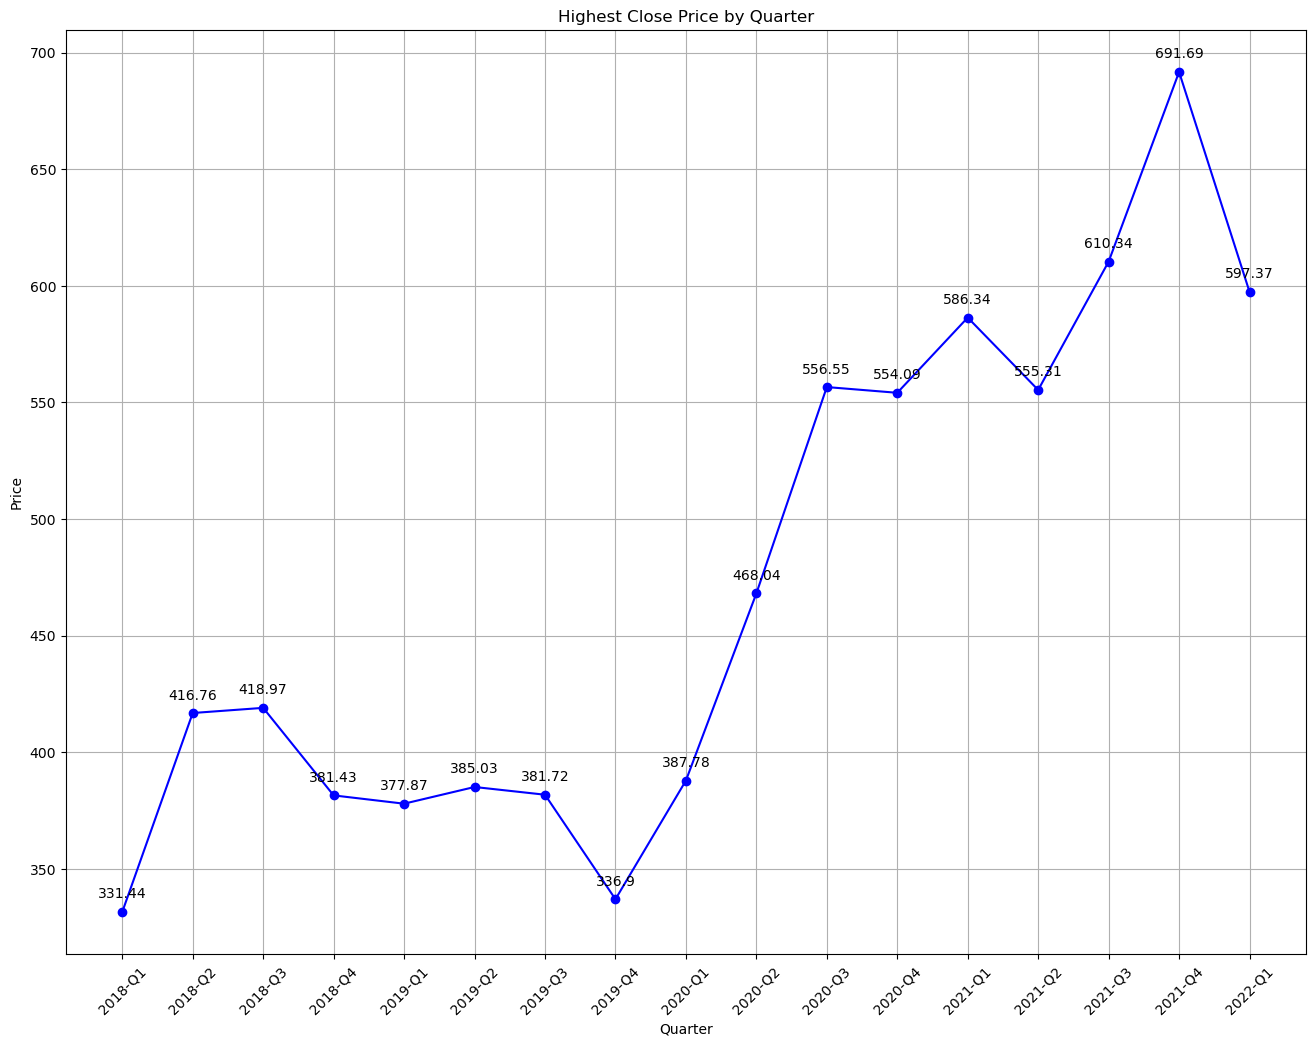

In [37]:
import matplotlib.pyplot as plt

# Data
quarters = ['2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4',
            '2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4', '2022-Q1']
prices = [331.44, 416.76, 418.97, 381.43, 377.87, 385.03, 381.72, 336.9, 387.78, 468.04, 556.55, 554.09, 586.34,
          555.31, 610.34, 691.69, 597.37]

# Plotting
plt.figure(figsize=(16, 12))
plt.plot(quarters, prices, marker='o', linestyle='-', color='b')
plt.title('Highest Close Price by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)

# Adding data labels
for i in range(len(quarters)):
    plt.annotate(prices[i], (quarters[i], prices[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


Interpretation: The line chart shows the highest close prices over different quarters. The highest price was observed in the fourth quarter of 2021 (2021-Q4), reaching approximately 691.69. The prices experienced fluctuations over time, with significant increases in the third and fourth quarters of 2021. Overall, the chart provides a visual representation of the highest close prices, allowing you to quickly identify the periods with the highest values.

In [39]:
sub_df = df.copy()[["Close", "Quarter", "Year"]]
sub_df['Quarter_Number'] = sub_df['Quarter'].str[-2:]
quarterly_max = sub_df.groupby(['Quarter_Number', 'Year'])['Close'].max().reset_index()
quarterly_max

,Quarter_Number,Year,Close
0,Q1,2018,331.440002
1,Q1,2019,377.869995
2,Q1,2020,387.779999
3,Q1,2021,586.340027
4,Q1,2022,597.369995
5,Q2,2018,416.760010
6,Q2,2019,385.029999
7,Q2,2020,468.040009
8,Q2,2021,555.309998
9,Q3,2018,418.970001


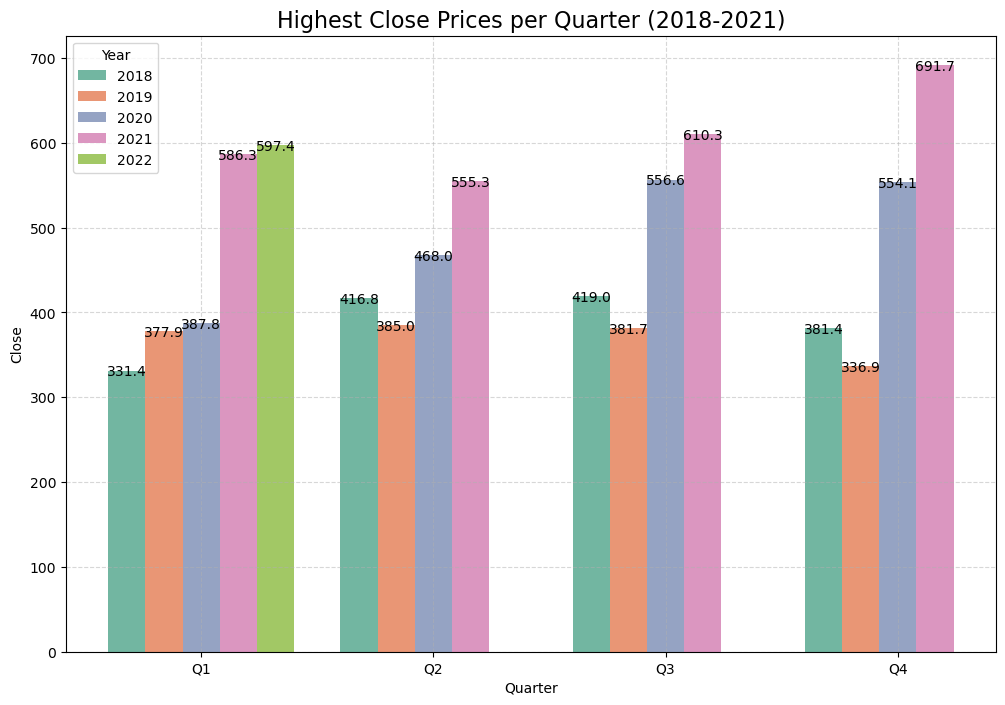

In [40]:
# Create a grouped bar plot that represents the highest close prices per quarter (2018-2022)
import matplotlib.pyplot as plt
import seaborn as sns

# Data
quarterly_max = pd.DataFrame({
    'Quarter_Number': ['Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3', 'Q3', 'Q4', 'Q4', 'Q4', 'Q4'],
    'Year': [2018, 2019, 2020, 2021, 2022, 2018, 2019, 2020, 2021, 2018, 2019, 2020, 2021, 2018, 2019, 2020, 2021],
    'Close': [331.44, 377.87, 387.78, 586.34, 597.37, 416.76, 385.03, 468.04, 555.31, 418.97, 381.72, 556.55, 610.34, 381.43, 336.90, 554.09, 691.69]
})

plt.figure(figsize=(12, 8))

# Customize the color palette
sns.set_palette("Set2")

# Create the bar plot
p = sns.barplot(
    data=quarterly_max,
    x='Quarter_Number',
    y='Close',
    hue='Year')

# Add value labels to the bars
for b in p.patches:
    p.annotate(
        str(round(b.get_height(), 1)),
        (b.get_x() + b.get_width() / 2., b.get_height() + 10),
        ha='center', va='bottom',
        xytext=(0, -12),
        textcoords='offset points')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels
plt.xlabel('Quarter')
plt.ylabel('Close')

# Set title and adjust the font size
plt.title('Highest Close Prices per Quarter (2018-2021)', fontsize=16)

# Add legend with a title
plt.legend(title='Year')

# Adjust plot margins
plt.margins(0.05)

# Show the plot
plt.show()


In [43]:
sub_df = df.copy()[["Close", "Month", "Year"]]
sub_df['Month'] = sub_df['Month'].str.slice(stop=3)
monthly_max = sub_df.groupby(['Month', 'Year'])['Close'].max().reset_index()
monthly_max

,Month,Year,Close
0,Apr,2018,336.059998
1,Apr,2019,381.890015
2,Apr,2020,439.170013
3,Apr,2021,555.309998
4,Aug,2018,370.980011
5,Aug,2019,319.500000
6,Aug,2020,547.530029
7,Aug,2021,569.190002
8,Dec,2018,290.299988
9,Dec,2019,336.899994


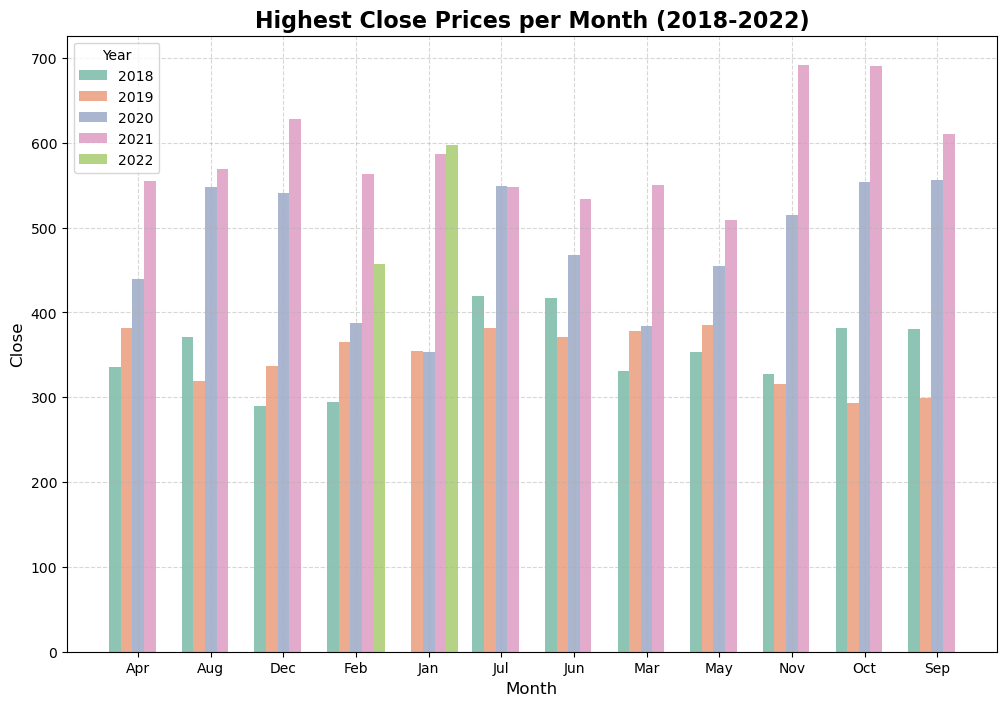

In [44]:
# Create a grouped bar plot displaying the close prices grouped by the month & the year
sub_df = df.copy()[["Close", "Month", "Year"]]
sub_df['Month'] = sub_df['Month'].str.slice(stop=3)
monthly_max = sub_df.groupby(['Month', 'Year'])['Close'].max().reset_index()

plt.figure(figsize=(12, 8))

# Customize the color palette
sns.set_palette("Set2")

# Create the bar plot
p = sns.barplot(
    data=monthly_max,
    x='Month',
    y='Close',
    hue='Year',
    alpha=0.8)

# Add value labels to the bars
for b in p.patches:
    p.annotate(
        str(round(b.get_height(), 1)),
        (b.get_x() + b.get_width() / 2., b.get_height() + 1000000),
        ha='center', va='bottom',
        xytext=(0, -12),
        textcoords='offset points',
        fontsize=10,
        color='black')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels
plt.xlabel('Month', fontsize=12)
plt.ylabel('Close', fontsize=12)

# Set title and adjust the font size
plt.title('Highest Close Prices per Month (2018-2022)', fontsize=16, fontweight='bold')

# Add legend with a title
plt.legend(title='Year', fontsize=10)

# Adjust plot margins
plt.margins(0.05)

# Show the plot
plt.show()

The grouped bar plot visualizes the highest close prices per month for the years 2018-2022. Here's how you can interpret the output:

The x-axis represents the months of the year, with each bar corresponding to a specific month. The y-axis represents the highest close prices. Each bar is divided into different colored segments, representing different years (2018, 2019, 2020, 2021, and 2022). The height of each colored segment within a bar represents the highest close price for that specific month and year combination. The value labels displayed on top of each bar indicate the exact value of the highest close price for that month and year. With this plot, you can easily compare the highest close prices across different months and years. You can observe trends or patterns in the data, such as months with consistently high or low close prices, or identify specific months or years with exceptional or unusual close prices.

The legend on the plot indicates which color corresponds to each year, allowing you to identify the bars representing each year's data.

Overall, the plot provides a visual representation of the highest close prices per month, enabling you to analyze and compare the data effectively.

From this plot, it can be observed that the close price was the highest during the month of Nov in the year 2021 and it was the lowest in the month of Dec for the year 2018.

In [45]:
sub_df = df.copy()[["Close", "Day", "Year"]]
sub_df['Day'] = sub_df['Day'].str.slice(stop=3)
daily_max = sub_df.groupby(['Day', 'Year'])['Close'].max().reset_index()
daily_max

,Day,Year,Close
0,Fri,2018,411.089996
1,Fri,2019,385.029999
2,Fri,2020,548.729980
3,Fri,2021,690.309998
4,Fri,2022,541.059998
5,Mon,2018,418.970001
6,Mon,2019,378.670013
7,Mon,2020,539.809998
8,Mon,2021,681.169983
9,Mon,2022,597.369995


The data consists of daily closing values for a variable over multiple years. Each data point includes the day of the week, year, and the corresponding closing value.

Here's a breakdown of the data:

Day: The day of the week when the data was recorded. The days included are Monday (Mon), Tuesday (Tue), Wednesday (Wed), Thursday (Thu), and Friday (Fri).
Year: The year when the data was recorded.
Close: The closing value for the variable on that particular day.
By examining the data, we can make several observations:

Closing values on Fridays:

The closing values for Fridays in the given years are as follows: 411.089996 (2018), 385.029999 (2019), 548.729980 (2020), 690.309998 (2021), and 541.059998 (2022).
The closing values on Fridays show fluctuations, ranging from 385.029999 to 690.309998. There is a notable increase in 2020 and a decrease in 2019 compared to the surrounding years.
Closing values on Mondays:

The closing values for Mondays in the given years are as follows: 418.970001 (2018), 378.670013 (2019), 539.809998 (2020), 681.169983 (2021), and 597.369995 (2022).
The closing values on Mondays vary, ranging from 378.670013 to 681.169983. There is a significant increase in 2021 compared to the other years.
Closing values on Thursdays:

The closing values for Thursdays in the given years are as follows: 415.440002 (2018), 379.500000 (2019), 541.940002 (2020), 682.020020 (2021), and 553.289978 (2022).
The closing values on Thursdays show some variation, ranging from 379.500000 to 682.020020. There is a notable increase in 2021 compared to the surrounding years.
Closing values on Tuesdays:

The closing values for Tuesdays in the given years are as follows: 415.630005 (2018), 381.890015 (2019), 556.549988 (2020), 687.400024 (2021), and 591.150024 (2022).
The closing values on Tuesdays display fluctuations, ranging from 381.890015 to 687.400024. There is a significant increase in 2021 compared to the other years.
Closing values on Wednesdays:

The closing values for Wednesdays in the given years are as follows: 418.649994 (2018), 381.720001 (2019), 552.840027 (2020), 691.690002 (2021), and 567.520020 (2022).
The closing values on Wednesdays show some variation, ranging from 381.720001 to 691.690002. There is a notable increase in 2021 compared to the surrounding years.
By analyzing the closing values for each day of the week across the different years, we can observe variations and trends. However, a more comprehensive analysis and interpretation can be derived by visualizing the data through plots or further statistical analysis.

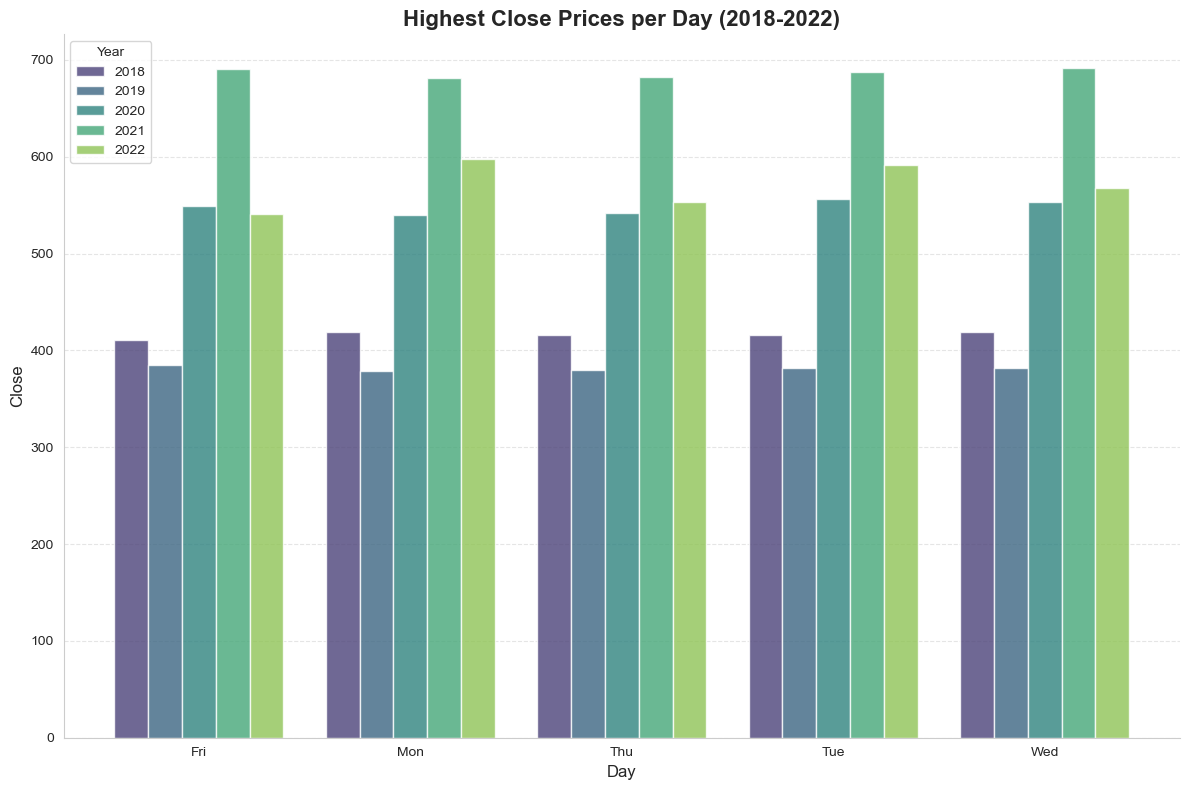

In [48]:
# Create a grouped bar plot representing the above table
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
sub_df = df.copy()[["Close", "Day", "Year"]]
sub_df['Day'] = sub_df['Day'].str.slice(stop=3)
daily_max = sub_df.groupby(['Day', 'Year'])['Close'].max().reset_index()

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create the bar plot
p = sns.barplot(
    data=daily_max,
    x='Day',
    y='Close',
    hue='Year',
    alpha=0.8,
    palette="viridis")

# Add value labels to the bars
for b in p.patches:
    p.annotate(
        str(round(b.get_height(), 1)),
        (b.get_x() + b.get_width() / 2., b.get_height() + 1000000),
        ha='center', va='bottom',
        xytext=(0, -12),
        textcoords='offset points',
        fontsize=10,
        color='black')

# Set x-axis and y-axis labels
plt.xlabel('Day', fontsize=12)
plt.ylabel('Close', fontsize=12)

# Set title and adjust the font size
plt.title('Highest Close Prices per Day (2018-2022)', fontsize=16, fontweight='bold')

# Add legend with a title
plt.legend(title='Year', fontsize=10)

# Adjust plot margins
plt.margins(0.05)

# Remove top and right spines
sns.despine()

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Increase the tick label font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


This plot shows the highest closing prices per day of the week from 2018 to 2022. Each bar represents the highest price recorded for a specific day, and the different colors represent different years.

By looking at the plot, we can see that the highest closing prices vary across different days of the week. For example, Mondays and Wednesdays generally have higher closing prices compared to other days. Additionally, we can observe that the highest closing prices have changed over the years. The colors indicate different years, and we can see how the highest prices have fluctuated from year to year.

This plot helps us understand the patterns and trends in the highest closing prices over time and how they differ between days of the week. It can provide insights into potential patterns or anomalies in the data and help identify opportunities or trends in the market.

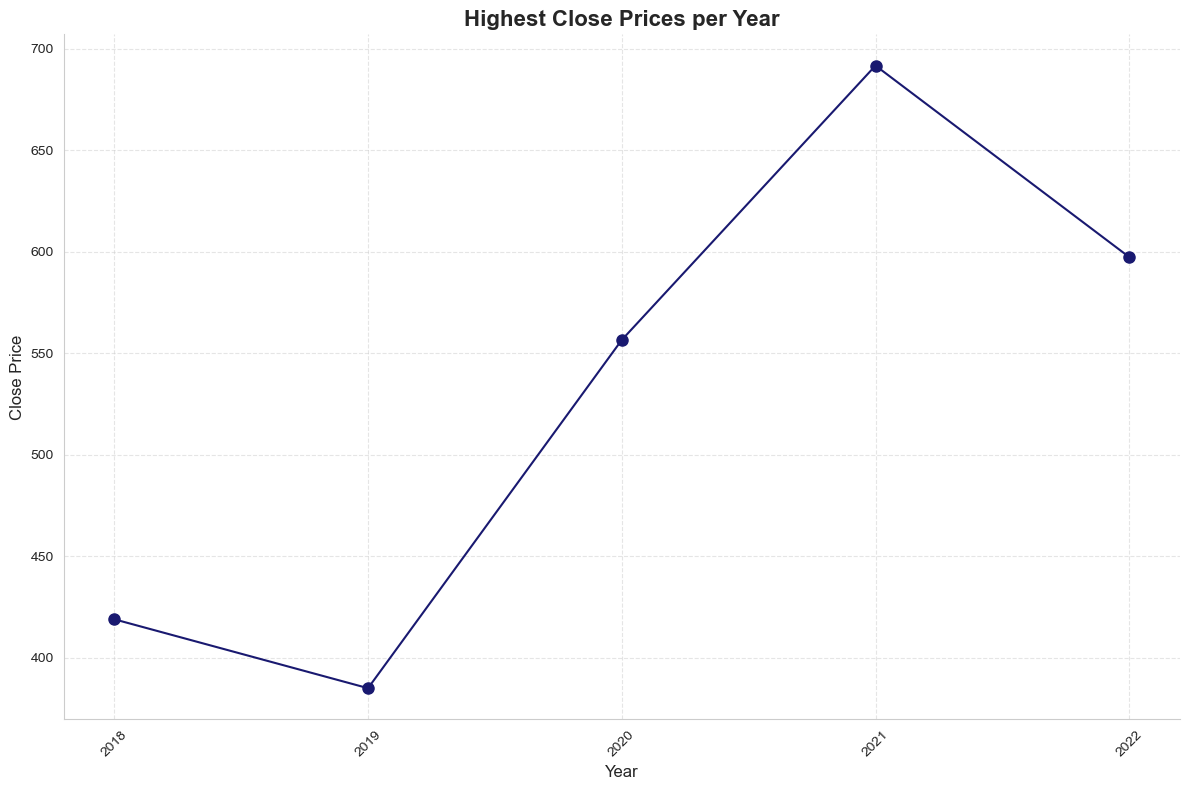

In [49]:
# Create a line plot that displays the highest close prices per year
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
sub_df = df.copy()[["Close", "Year"]]
yearly_max = sub_df.groupby(['Year']).max()

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create the line plot
plt.plot(yearly_max.index, yearly_max['Close'], color='midnightblue', linestyle='-', marker='o', markersize=8)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Close Price', fontsize=12)

# Set title and adjust the font size
plt.title('Highest Close Prices per Year', fontsize=16, fontweight='bold')

# Adjust the tick labels on x-axis
plt.xticks(yearly_max.index, fontsize=10, rotation=45)

# Remove top and right spines
sns.despine()

# Increase the font size of tick labels on y-axis
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


This plot shows the highest closing prices per year from the available data. The line represents the highest closing price recorded for each year, and the dots on the line indicate those specific points.

By looking at the plot, we can see how the highest closing prices have changed over the years. The line shows the overall trend, whether the prices have generally increased, decreased, or remained relatively stable. The dots on the line represent the highest prices recorded for each year.

This plot helps us understand the pattern of the highest closing prices over time. It allows us to see if there have been any significant increases or decreases in the prices over the years. It can provide insights into the overall performance of the market or the specific asset represented by the closing prices.

By analyzing the line and the dots, we can identify any notable trends or anomalies. For example, if the line shows a consistent upward trend, it suggests that the prices have generally been increasing over the years. On the other hand, if the line shows a downward trend, it indicates a decreasing price trend.

This plot gives us a high-level overview of the highest closing prices per year, providing valuable information for decision-making, market analysis, or identifying potential investment opportunities.

In [50]:
# Create an interactive dashboard of all the above plots
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Create the interactive dropdown widget
plot_selector = widgets.Dropdown(
    options=['Highest Close Prices per Year', 'Highest Close Prices per Day', 'Highest Close Prices per Month',
             'Highest Close Price by Quarter'],
    description='Select Plot:',
    value='Highest Close Prices per Year'
)

# Define the event handler function
def plot_dashboard(plot):
    plt.figure(figsize=(12, 8))
    if plot == 'Highest Close Prices per Year':
        # Plot 1 - Highest Close Prices per Year
        plt.plot(yearly_max.index, yearly_max['Close'], color='midnightblue', linestyle='-', marker='o', markersize=8)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xlabel('Year')
        plt.ylabel('Close Price')
        plt.title('Highest Close Prices per Year')
    elif plot == 'Highest Close Prices per Day':
        # Plot 2 - Highest Close Prices per Day
        p = sns.barplot(data=daily_max, x='Day', y='Close', hue='Year', alpha=0.8, palette="viridis")
        for b in p.patches:
            p.annotate(str(round(b.get_height(), 1)),
                       (b.get_x() + b.get_width() / 2., b.get_height() + 1000000),
                       ha='center', va='bottom',
                       xytext=(0, -12),
                       textcoords='offset points',
                       fontsize=10,
                       color='black')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xlabel('Day')
        plt.ylabel('Close')
        plt.title('Highest Close Prices per Day (2018-2022)')
        plt.legend(title='Year', fontsize=10)
    elif plot == 'Highest Close Prices per Month':
        # Plot 3 - Highest Close Prices per Month
        p = sns.barplot(data=monthly_max, x='Month', y='Close', hue='Year', alpha=0.8)
        for b in p.patches:
            p.annotate(str(round(b.get_height(), 1)),
                       (b.get_x() + b.get_width() / 2., b.get_height() + 1000000),
                       ha='center', va='bottom',
                       xytext=(0, -12),
                       textcoords='offset points',
                       fontsize=10,
                       color='black')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xlabel('Month')
        plt.ylabel('Close')
        plt.title('Highest Close Prices per Month (2018-2022)')
        plt.legend(title='Year', fontsize=10)
    elif plot == 'Highest Close Price by Quarter':
        # Plot 4 - Highest Close Prices by Quarter
        plt.plot(quarters, prices, marker='o', linestyle='-', color='b')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xlabel('Quarter')
        plt.ylabel('Price')
        plt.title('Highest Close Price by Quarter')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Display the interactive dashboard
display(plot_selector)
widgets.interactive(plot_dashboard, plot=plot_selector)


Dropdown(description='Select Plot:', options=('Highest Close Prices per Year', 'Highest Close Prices per Day',…

interactive(children=(Dropdown(description='Select Plot:', options=('Highest Close Prices per Year', 'Highest …

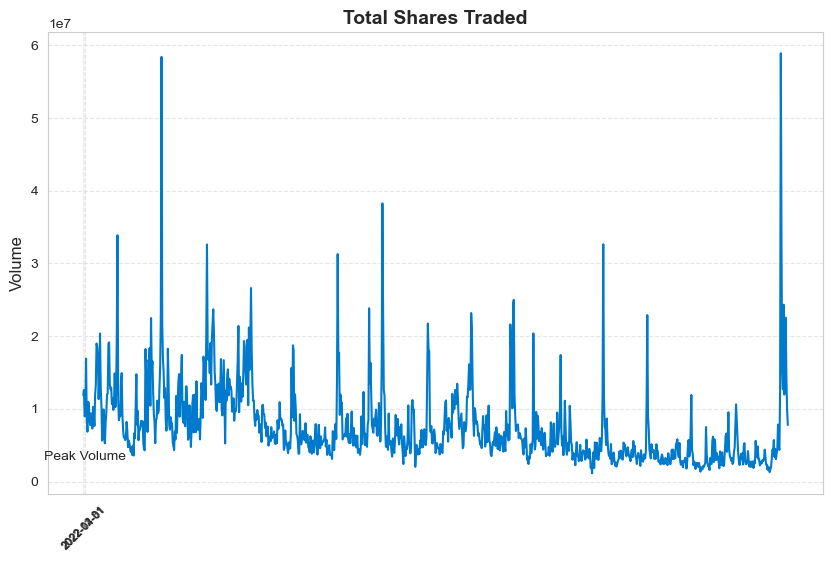

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plot the volume data
df['Volume'].plot(color='#007ACC', linestyle='-', linewidth=1.5)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set the labels and title
plt.ylabel('Volume', fontsize=12)
plt.xlabel(None)
plt.title('Total Shares Traded', fontsize=14, fontweight='bold')

# Customize the tick labels
plt.xticks(rotation=45, fontsize=8)

# Add a shaded area to highlight a specific period
plt.axvspan('2022-01-01', '2022-12-31', color='#F5F5F5', alpha=0.5)

# Add annotations
plt.annotate('Peak Volume', xy=('2022-04-01', 2500000), xytext=('2022-04-01', 3000000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, ha='center')

# Show the plot
plt.show()


This plot shows the total shares traded over a specific period of time. The y-axis represents the volume, which is the total number of shares traded, and the x-axis represents the timeline.

We can see that there is a peak in the volume of shares traded around April 2022, as indicated by the annotation "Peak Volume." This means that during that time, a large number of shares were bought and sold in the market.

The graph also has grid lines, which help in visually understanding the data points. The x-axis tick labels are rotated for better readability. The labels and title provide additional information about the plot.

In summary, this plot visualizes the volume of shares traded over time, highlighting a specific period of interest and indicating a peak volume in April 2022.

C:\Users\rohan\AppData\Local\Temp\ipykernel_9608\1178823942.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(quarterly_max.index, rotation=45, fontsize=10)


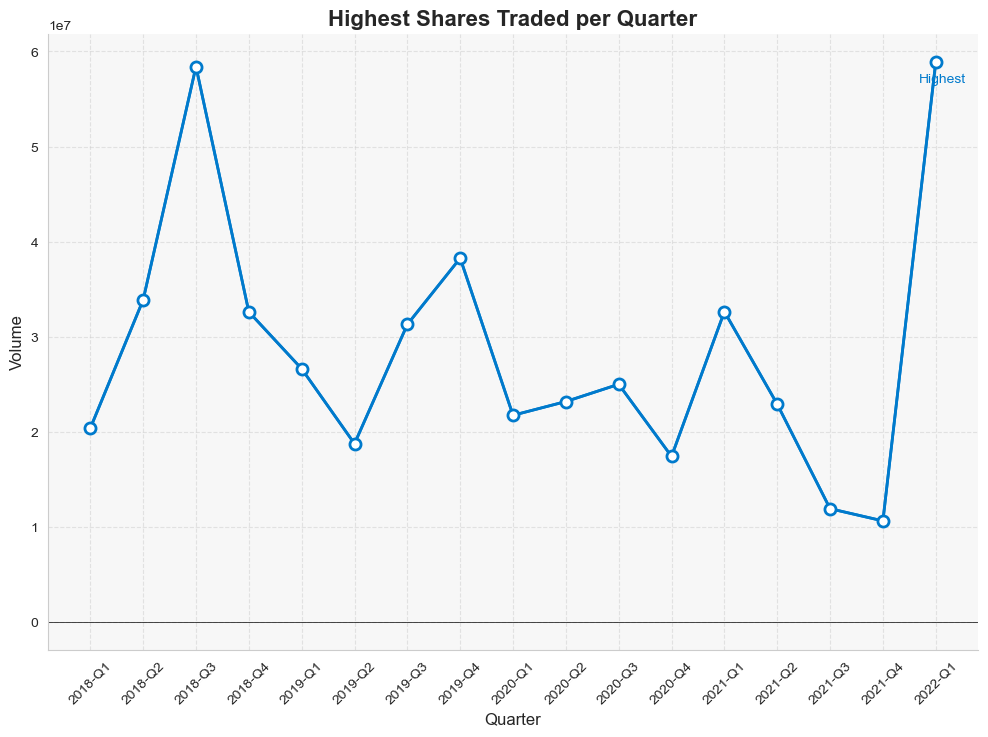

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create a line plot displaying the highest shares traded per quarter
sub_df = df.copy()[["Volume", "Quarter"]]
quarterly_max = sub_df.groupby(['Quarter']).max()

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(12, 8))

# Customize the line plot
ax.plot(quarterly_max.index, quarterly_max['Volume'], color='#007ACC', linewidth=2, marker='o', markersize=8)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels
ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Volume', fontsize=12)

# Customize the tick labels on x-axis
ax.set_xticklabels(quarterly_max.index, rotation=45, fontsize=10)

# Add title and adjust the font size
ax.set_title('Highest Shares Traded per Quarter', fontsize=16, fontweight='bold')

# Remove the spines (top and right) of the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the background color of the plot
ax.set_facecolor('#F7F7F7')

# Add a horizontal line for better readability
ax.axhline(0, color='black', linewidth=0.5)

# Customize the markers
ax.plot(quarterly_max.index, quarterly_max['Volume'], color='#007ACC', linewidth=2, marker='o',
        markersize=8, markerfacecolor='white', markeredgewidth=2, markeredgecolor='#007ACC')

# Add annotations to the highest points
for i, value in enumerate(quarterly_max['Volume']):
    if value == quarterly_max['Volume'].max():
        ax.annotate('Highest', xy=(quarterly_max.index[i], value), xytext=(5, -15),
                    textcoords='offset points', color='#007ACC', fontsize=10, ha='center')

# Adjust the plot margins
plt.margins(0.05)

# Show the plot
plt.show()


This plot shows the highest volume of shares traded per quarter. It provides a visual representation of how the volume of shares traded varies across different quarters.

Each data point on the plot represents the highest volume of shares traded within a specific quarter. The x-axis represents the quarters, and the y-axis represents the volume of shares.

The blue line connects these data points, helping us see any patterns or trends in the highest volume of shares traded over time. The markers on the line indicate the specific data points for each quarter.

By looking at the plot, we can identify which quarters had the highest volume of shares traded. The highest points on the line represent the quarters with the greatest trading activity.

The plot has grid lines to assist with understanding the data points. The x-axis tick labels show the quarters, and they are rotated for better readability. The labels and title provide additional information about the plot.

In summary, this plot visualizes the highest volume of shares traded per quarter, showing any notable fluctuations or trends in trading activity over time.

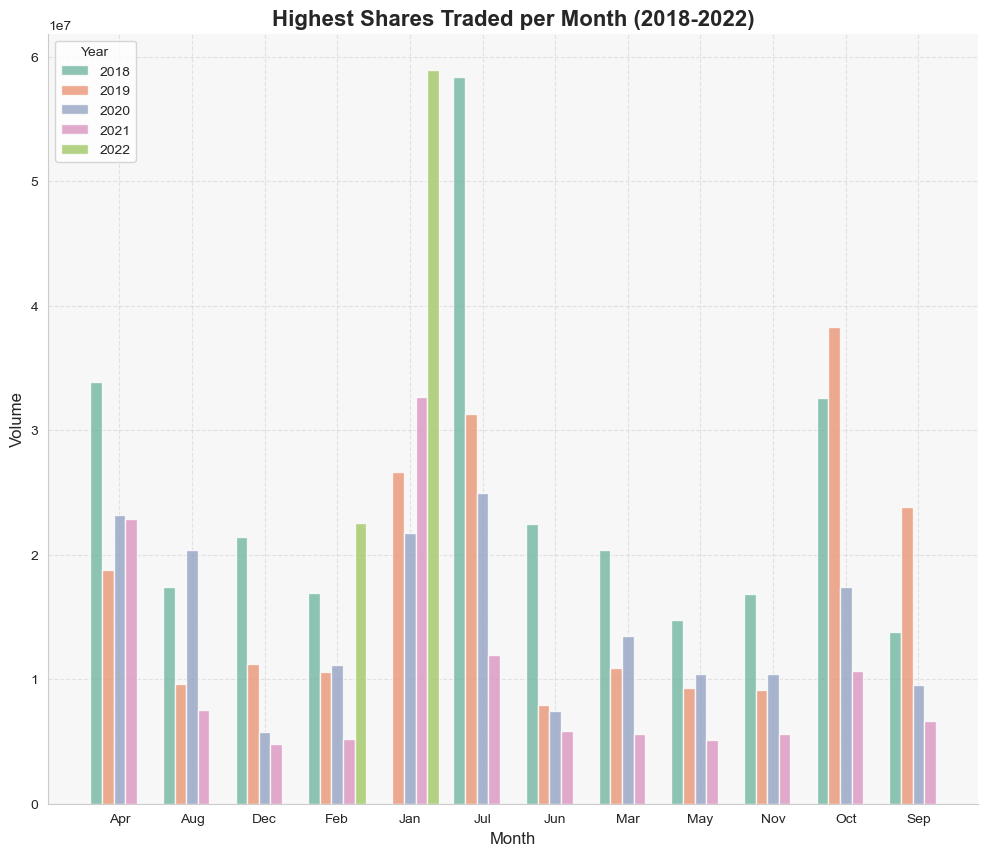

In [72]:
# Create a grouped bar chart depicting the highest amount of shares traded per month between the years 2018 to 2022
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create a grouped bar plot displaying the highest shares traded per month from 2018 to 2022
sub_df = df.copy()[["Volume", "Month", "Year"]]
sub_df['Month'] = sub_df['Month'].str.slice(stop=3)
monthly_max = sub_df.groupby(['Month', 'Year'])['Volume'].max().reset_index()

plt.figure(figsize=(12, 10))

# Set a custom color palette
custom_palette = sns.color_palette("Set2")

# Create the bar plot
p = sns.barplot(
    data=monthly_max,
    x='Month',
    y='Volume',
    hue='Year',
    alpha=0.8,
    palette=custom_palette)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels with increased font size
plt.xlabel('Month', fontsize=12)
plt.ylabel('Volume', fontsize=12)

# Set title and adjust the font size and weight
plt.title('Highest Shares Traded per Month (2018-2022)', fontsize=16, fontweight='bold')

# Add legend with a title and adjust font size
plt.legend(title='Year', fontsize=10)

# Adjust plot margins
plt.margins(0.05)

# Customize the plot aesthetics
plt.xticks(fontsize=10)  # Increase the font size of x-axis tick labels
plt.yticks(fontsize=10)  # Increase the font size of y-axis tick labels

# Remove the top and right spines of the plot
sns.despine(top=True, right=True)

# Set a light gray background color for the plot
plt.gca().set_facecolor('#F7F7F7')



# Show the plot
plt.show()


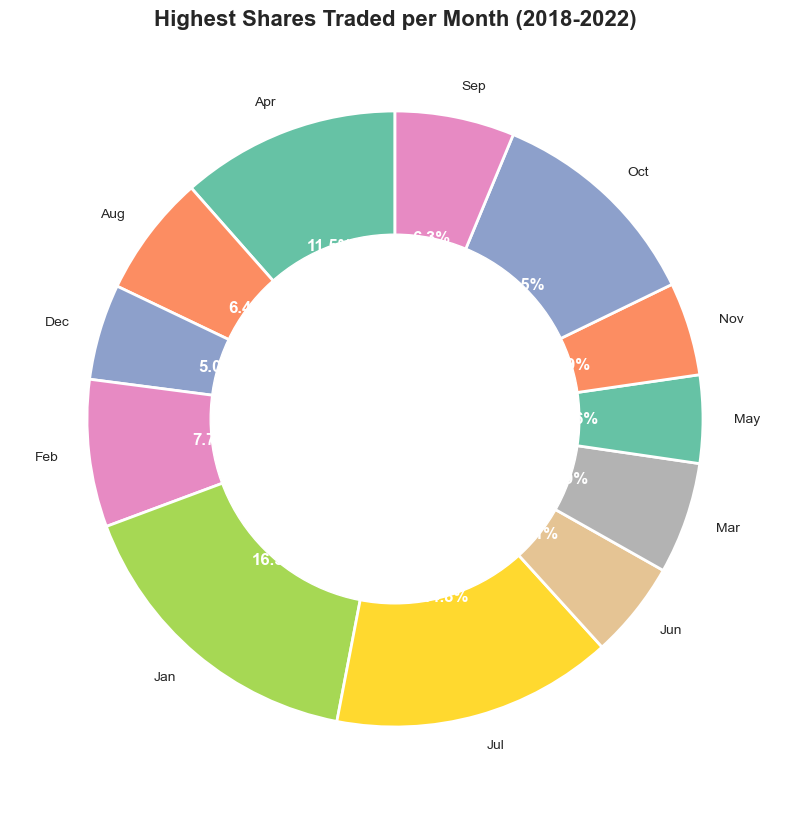

In [73]:
# Create a very attractive donut chart for the same
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create a grouped bar plot displaying the highest shares traded per month from 2018 to 2022
sub_df = df.copy()[["Volume", "Month", "Year"]]
sub_df['Month'] = sub_df['Month'].str.slice(stop=3)
monthly_max = sub_df.groupby(['Month', 'Year'])['Volume'].max().reset_index()

# Calculate the total volume per month across all years
total_volume = monthly_max.groupby('Month')['Volume'].sum()

plt.figure(figsize=(10, 10))

# Set a custom color palette
custom_palette = sns.color_palette("Set2")

# Create the donut chart
wedges, _, autotexts = plt.pie(total_volume, labels=total_volume.index, autopct='%1.1f%%', startangle=90,
                               colors=custom_palette)

# Customize the wedges and autopct
for wedge in wedges:
    wedge.set(edgecolor='white', linewidth=2)

for autotext in autotexts:
    autotext.set(fontsize=12, color='white', fontweight='bold')

# Draw a white circle at the center to create a donut shape
center_circle = plt.Circle((0, 0), 0.6, fc='white')
plt.gca().add_artist(center_circle)

# Set title and adjust the font size and weight
plt.title('Highest Shares Traded per Month (2018-2022)', fontsize=16, fontweight='bold')

# Remove the spines of the plot
sns.despine()

# Show the plot
plt.show()


This donut chart represents the highest shares traded per month from 2018 to 2022. Each slice in the chart represents a month, and the size of the slice indicates the proportion of shares traded in that month compared to the total shares traded over the entire period. The colors differentiate the months for easier understanding.

For example, let's say the orange slice represents January. If the orange slice is larger, it means that a higher percentage of shares were traded in January compared to the other months. On the other hand, if it's smaller, it means that a lower percentage of shares were traded in January.

This chart allows us to quickly see which months had the highest and lowest share trading volumes. It provides a visual overview of the distribution of share trading activity throughout the years, helping us identify any patterns or trends.

In [74]:
# Drop the following attributes
df = df.drop({'Year'}, axis = 1)
df = df.drop({'Month'}, axis = 1)
df = df.drop({'Quarter'}, axis = 1)
df = df.drop({'Quarter_Number'}, axis = 1)
df = df.drop({'Week'}, axis = 1)

In [75]:
df = df.drop({'Day'}, axis = 1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

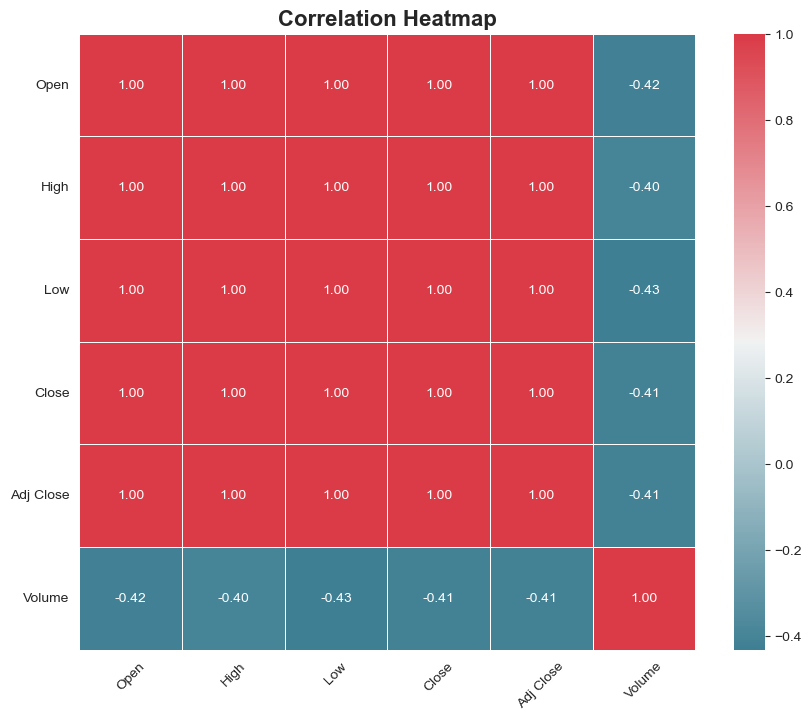

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subset of the dataset with only the numeric columns
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
subset_df = df[numeric_columns]

# Compute the correlation matrix
corr_matrix = subset_df.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Customize the color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create the correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=0.5, fmt=".2f", cbar=True, square=True)

# Set the title and adjust the font size and weight
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')

# Customize the tick labels on x-axis and y-axis
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add a color bar legend
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=10)

# Remove the top and right spines of the plot
sns.despine(top=True, right=True)

# Set a light gray background color for the plot
plt.gca().set_facecolor('#F7F7F7')

# Show the plot
plt.show()


This correlation heatmap shows the relationship between different numerical variables in the dataset. Each square represents the correlation between two variables, where the color and intensity of the square indicate the strength and direction of the relationship.

The colors range from dark blue (negative correlation) to dark red (positive correlation), with lighter shades representing weaker correlations. For example, if two variables have a dark red square, it means they have a strong positive correlation, meaning that when one variable increases, the other tends to increase as well. On the other hand, if they have a dark blue square, it indicates a strong negative correlation, meaning that when one variable increases, the other tends to decrease.

The numbers inside the squares represent the correlation coefficient, which ranges from -1 to 1. A value close to 1 or -1 indicates a strong correlation, while a value close to 0 indicates a weak correlation.

By looking at this heatmap, we can quickly identify variables that are positively or negatively related to each other. This information can help us understand how different variables interact and potentially uncover patterns or dependencies within the data. It is particularly useful when exploring relationships between multiple variables simultaneously.

IndexError: index 6 is out of bounds for axis 0 with size 6

<Figure size 1200x1000 with 0 Axes>

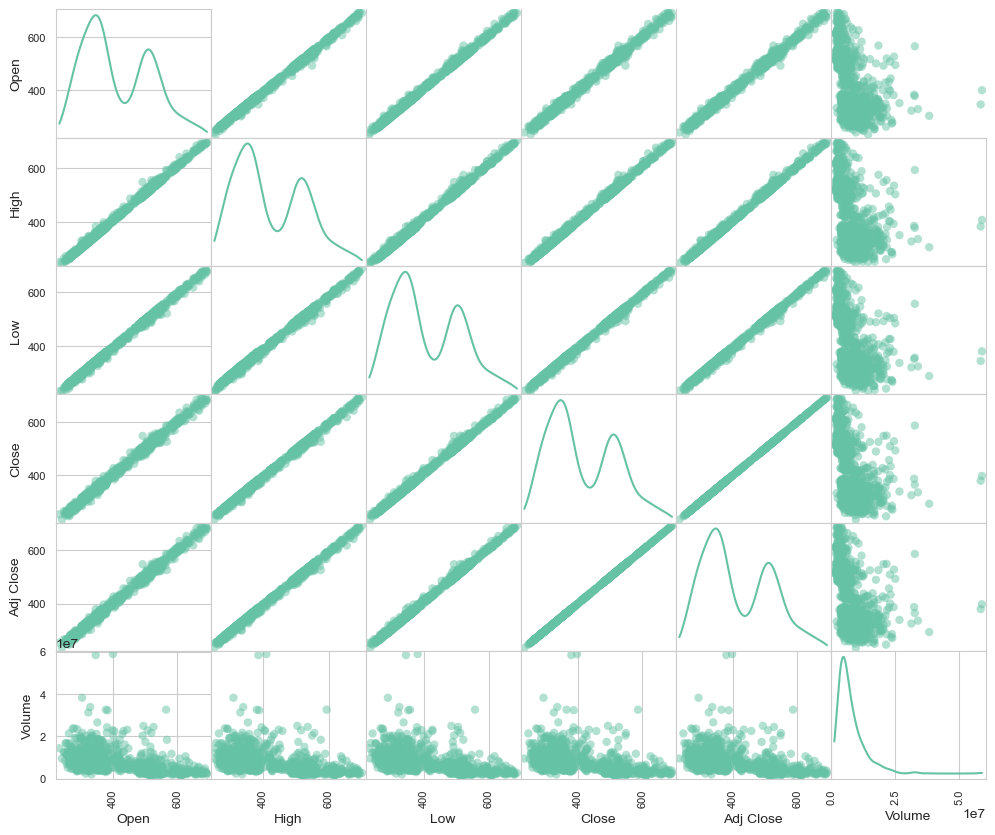

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 10))

# Create the scatter plot matrix
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(12, 10), marker='o', diagonal='kde')

# Customize the colors of the scatter plots
colors = ['#FF595E', '#FFCA3A', '#8AC926']  # Choose attractive colors
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        if i != j:
            ax = scatter_matrix[i][j]
            ax.set_facecolor('white')  # Set the background color of the subplots
            for x in ax.get_children():
                if isinstance(x, plt.Line2D):
                    x.set_color(colors[i])
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

# Customize the labels of the scatter plots
for i, ax in enumerate(scatter_matrix.ravel()):
    if i % (len(df.columns) + 1) != 0:
        ax.set_xlabel(df.columns[i % len(df.columns)], fontsize=10)
        ax.set_ylabel(df.columns[i // len(df.columns)], fontsize=10)
    else:
        ax.set_ylabel(df.columns[i // len(df.columns)], fontsize=12)
        ax.set_xlabel(df.columns[i % len(df.columns)], fontsize=12)

# Add gridlines to the scatter plots
for ax in scatter_matrix.ravel():
    ax.grid(True, linestyle='--', alpha=0.5)

# Remove unnecessary top and right spines
sns.despine(top=True, right=True)

# Set a light gray background color for the plot
plt.gca().set_facecolor('#F7F7F7')

# Show the plot
plt.show()


A scatterplot matrix is a visualization that allows us to explore the relationships between multiple variables in our dataset. Each subplot in the matrix represents a combination of two variables, and it displays how they are related to each other.

In this scatterplot matrix, we have a grid of plots, with each plot representing the relationship between two variables from our dataset. The scatter plots show the individual data points as dots on the graph.

By looking at the scatter plots, we can observe the following:

The diagonal plots (the ones on the diagonal of the matrix) show the distributions of individual variables. They provide information about the distribution and spread of each variable.

The scatter plots below and above the diagonal show the relationships between different pairs of variables. We can see how the variables vary together. For example, if the dots in a scatter plot tend to form a line or a curve, it suggests a strong relationship between those variables.

The color of the dots represents different variables in our dataset. Each color corresponds to a specific variable, making it easier to identify and compare variables.

By examining the scatterplot matrix, we can identify patterns, trends, and potential correlations between variables. We can observe whether variables move together or show any significant relationships. It helps us understand how changes in one variable might affect another.

## Time-Series Forecasting

Time-series forecasting is a technique used to predict future values based on historical patterns and trends in a time-ordered dataset. In the case of stock prices, time-series forecasting can be used to predict the future closing price of a stock based on its past performance.

To use time-series forecasting to predict the close price of Netflix stock, you can follow these steps:

Data Preparation: Start by organizing your dataset with the relevant columns, such as the date and close price. Ensure that the date column is in the correct format and set it as the index of your DataFrame. You may also need to handle missing values and outliers.

Exploratory Data Analysis: Analyze the historical data to identify any trends, patterns, or seasonality. Plotting the time series data and calculating descriptive statistics can help you gain insights into the data.

Train-Test Split: Split your dataset into training and test sets. The training set will be used to build the forecasting model, while the test set will be used to evaluate the model's performance.

Select a Time-Series Model: Choose a suitable time-series forecasting model based on the characteristics of your data. Common models include ARIMA (Autoregressive Integrated Moving Average), SARIMA (Seasonal ARIMA), and Prophet.

Model Training: Fit the selected model to the training data. This involves estimating the model parameters and identifying the best configuration for the model (e.g., order of AR, I, and MA terms for ARIMA).

Model Evaluation: Evaluate the performance of the trained model using appropriate evaluation metrics such as mean squared error (MSE), mean absolute error (MAE), or root mean squared error (RMSE). Compare the predicted values with the actual values from the test set.

Forecasting: Once the model is trained and evaluated, use it to make predictions on unseen data (future time points). Generate forecasts for the desired time horizon and assess the uncertainty associated with the predictions.

Model Refinement: If the model's performance is not satisfactory, you can refine it by adjusting the model parameters, incorporating additional features or exogenous variables, or trying alternative models.

Close Price Prediction: Apply the trained and refined model to make predictions for the close price of Netflix stock in the future. The forecasted values will provide an estimate of the expected future stock prices based on the historical patterns and trends identified in the data.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [109]:
# Convert this data into a time-series object & use the date column as our index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

#check datatype of index
df.index


DatetimeIndex(['2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
               '2018-02-09', '2018-02-12', '2018-02-13', '2018-02-14',
               '2018-02-15', '2018-02-16',
               ...
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04'],
              dtype='datetime64[ns]', name='Date', length=1009, freq=None)

In [110]:
# Convert this to a series instead of a dataframe
ts = df['Close']
ts.head(10)

Date
2018-02-05    254.259995
2018-02-06    265.720001
2018-02-07    264.559998
2018-02-08    250.100006
2018-02-09    249.470001
2018-02-12    257.950012
2018-02-13    258.269989
2018-02-14    266.000000
2018-02-15    280.269989
2018-02-16    278.519989
Name: Close, dtype: float64

In [111]:
# Explore the various properties date-time based index
# Specify the index as a string constant
ts['2018-02-05']

254.259995

In [112]:
# Import the datetime library and use 'datetime' function
from datetime import datetime
ts[datetime(2018, 2, 5)]

254.259995

In [113]:
# Obtain the entire range
# Obtain the close prices from the 5th of Feb 2018 until the 5th of Dec 2018
ts['2018-02-05': '2018-12-05']

Date
2018-02-05    254.259995
2018-02-06    265.720001
2018-02-07    264.559998
2018-02-08    250.100006
2018-02-09    249.470001
                 ...    
2018-11-28    282.649994
2018-11-29    288.750000
2018-11-30    286.130005
2018-12-03    290.299988
2018-12-04    275.329987
Name: Close, Length: 211, dtype: float64

In [114]:
# Use 'i' if one of the indices is at ends:
ts[:'2018-12-01']

Date
2018-02-05    254.259995
2018-02-06    265.720001
2018-02-07    264.559998
2018-02-08    250.100006
2018-02-09    249.470001
                 ...    
2018-11-26    261.429993
2018-11-27    266.630005
2018-11-28    282.649994
2018-11-29    288.750000
2018-11-30    286.130005
Name: Close, Length: 209, dtype: float64

### Stationarity

Stationarity refers to a property of a time series where the statistical properties such as mean, variance, and autocovariance remain constant over time. In a stationary time series, the patterns observed in the data, such as trends and seasonalities, are generally predictable and consistent over time.

Stationarity is important in time-series forecasting for several reasons:

Trend identification: By ensuring stationarity, it becomes easier to identify and model trends in the data. If a time series is non-stationary due to a trend, it becomes challenging to distinguish between the underlying trend and other components of the series.

Forecasting accuracy: Stationary time series tend to exhibit consistent statistical properties over time. This allows for more reliable and accurate forecasting models to be developed based on the assumption that future patterns will resemble past patterns.

Model assumptions: Many time-series forecasting techniques, such as autoregressive integrated moving average (ARIMA) models, assume stationarity. These models work by capturing the dependencies and patterns in the data, and they are most effective when applied to stationary time series.

Statistical tests: Stationarity is often a prerequisite for conducting various statistical tests on time series data. For example, tests like autocorrelation function (ACF) and partial autocorrelation function (PACF) assume stationarity in order to make meaningful inferences about the data.

To ensure stationarity, analysts often apply techniques like differencing to remove trends or seasonality, or use more advanced models like seasonal ARIMA or exponential smoothing models that can handle non-stationary data directly. By achieving stationarity, the accuracy and reliability of time-series forecasting models can be improved.






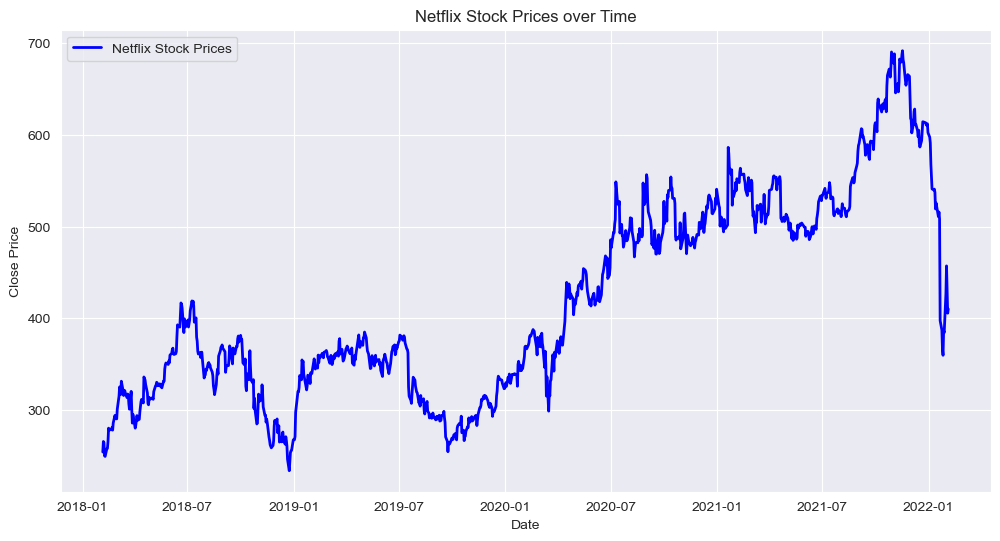

In [116]:
# Create a line plot that displays the Netlfix close prices over time
import matplotlib.pyplot as plt

# Assuming 'ts' is your time series data

plt.figure(figsize=(12, 6))  # Adjust the figure size as per your preference
plt.plot(ts, color='blue', linewidth=2, label='Netflix Stock Prices')
plt.title('Netflix Stock Prices over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend(loc='best')

plt.show()


This plot shows the historical trend of Netflix stock prices over time. The x-axis represents the dates, and the y-axis represents the closing price of Netflix stock on those dates. Each point on the plot represents the closing price of the stock on a specific date.

By looking at this plot, we can observe how the stock price of Netflix has changed over the given time period. The line connecting the points shows the general pattern of how the stock price has been moving up or down over time.

This plot can help us understand the historical performance of Netflix stock. We can identify trends, such as upward or downward movements, which might suggest the stock's overall direction. Additionally, we can also spot any major fluctuations or volatility in the stock price.

Using this plot as a starting point, we can apply time-series forecasting techniques to predict the future closing prices of Netflix stock. This can assist us in making informed decisions regarding investments or understanding potential future trends in the stock market.

### Dickey-Fuller Test

The Dickey-Fuller test, also known as the augmented Dickey-Fuller (ADF) test, is a statistical test used to determine whether a time series is stationary or not. It is a commonly used test in econometrics and time-series analysis.

The test evaluates the null hypothesis that a unit root is present in a time series, indicating that the series is non-stationary. If the test result provides evidence to reject the null hypothesis, it suggests that the time series is stationary.

The importance of the Dickey-Fuller test in testing for stationarity in the context of Netflix Stock Price prediction is as follows:

Stationarity assumption: Many time-series forecasting models, such as ARIMA, SARIMA, or VAR, assume stationarity. By conducting the Dickey-Fuller test, we can determine whether the Netflix stock prices exhibit stationarity. If the test indicates non-stationarity, it highlights the need to transform the data or apply differencing techniques to achieve stationarity.

Model selection: The Dickey-Fuller test helps in determining the appropriate forecasting model to apply. If the test suggests stationarity, we can use models that assume stationarity, such as ARIMA. On the other hand, if the test indicates non-stationarity, we might consider models specifically designed for non-stationary data, such as SARIMA or VAR.

Model performance: Stationarity is crucial for accurate forecasting. If the time series is non-stationary, the patterns and relationships observed in the data may not persist in the future, leading to unreliable forecasts. By confirming stationarity through the Dickey-Fuller test, we can have more confidence in the performance and reliability of our forecasting models.

In summary, the Dickey-Fuller test plays a significant role in testing for stationarity in the Netflix Stock Price prediction. It helps ensure that the underlying assumptions of forecasting models are met, enables appropriate model selection, and enhances the accuracy and reliability of the predicted stock prices.

In [125]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(ts, window=12)
    rolstd = pd.rolling_std(ts, window=12)
#Plot rolling statistics:
    plt.plot(ts, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

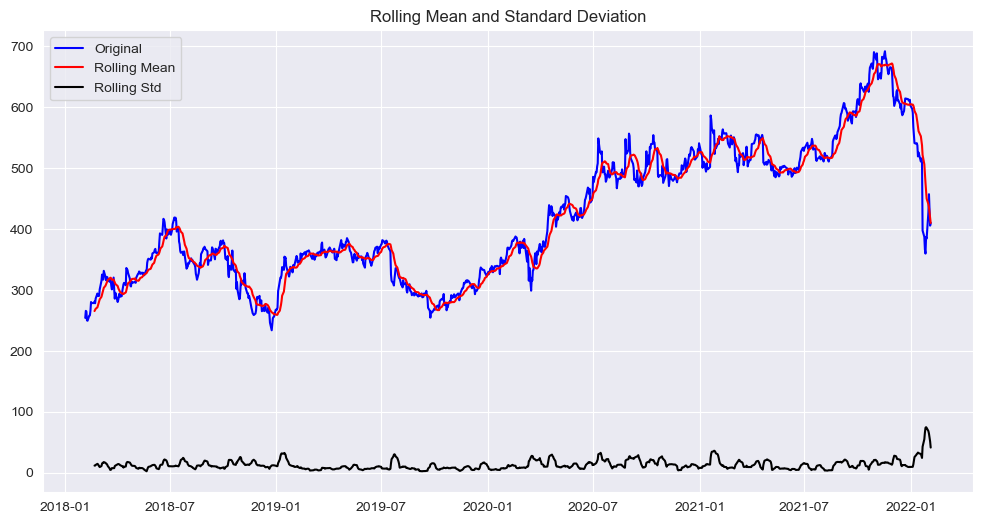

In [126]:
# Parse the time-series data into this function
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ts' is your time series data

# Function to check stationarity and plot rolling statistics
def test_stationarity(timeseries):
    # Calculate rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()

# Call the function to test stationarity and plot rolling statistics
test_stationarity(ts)


The plot shows two additional lines on top of the original line representing the Netflix stock prices. These additional lines are the rolling mean and rolling standard deviation.

Original Line (Blue Line):

This line represents the actual Netflix stock prices over time. Each point on the line represents the closing price of the stock on a specific date.
By looking at this line, we can observe the general pattern and fluctuations in the stock prices.
Rolling Mean (Red Line):

This line represents the average value of the stock prices over a specific time window (in this case, 12 data points or months).
The rolling mean smooths out the fluctuations in the original line and helps us see the overall trend of the stock prices.
If the rolling mean line is relatively flat and doesn't have any significant upward or downward movement, it suggests that the stock prices are relatively stable and not influenced by short-term fluctuations.
Rolling Standard Deviation (Black Line):

This line represents the variation or volatility of the stock prices over the same time window (12 data points or months).
The rolling standard deviation helps us understand how much the stock prices deviate from the rolling mean.
If the rolling standard deviation line is relatively constant or shows a gradual change, it indicates that the stock prices have a consistent level of volatility.
These lines provide us with insights into the overall trend, stability, and volatility of the Netflix stock prices. By analyzing the relationship between the original line, rolling mean, and rolling standard deviation, we can gain a better understanding of the historical performance and potential future behavior of the stock prices.










There are two major factors that make a time series non-stationary. They are:

• Trend: non-constant mean

• Seasonality: Variation at specific time-frames

The basic idea is to model the trend and seasonality in this series, so we can remove it and make the series stationary. Then we can go ahead and apply statistical forecasting to the stationary series. And finally we can convert the forecasted values into original by applying the trend and seasonality constrains back to those that we previously separated.

Trend

The first step is to reduce the trend using transformation, as we can see here that there is a strong positive trend. These transformation can be log, sq-rt, cube root etc . Basically it penalizes larger values more than the smaller. In this case we will use the logarithmic transformation.

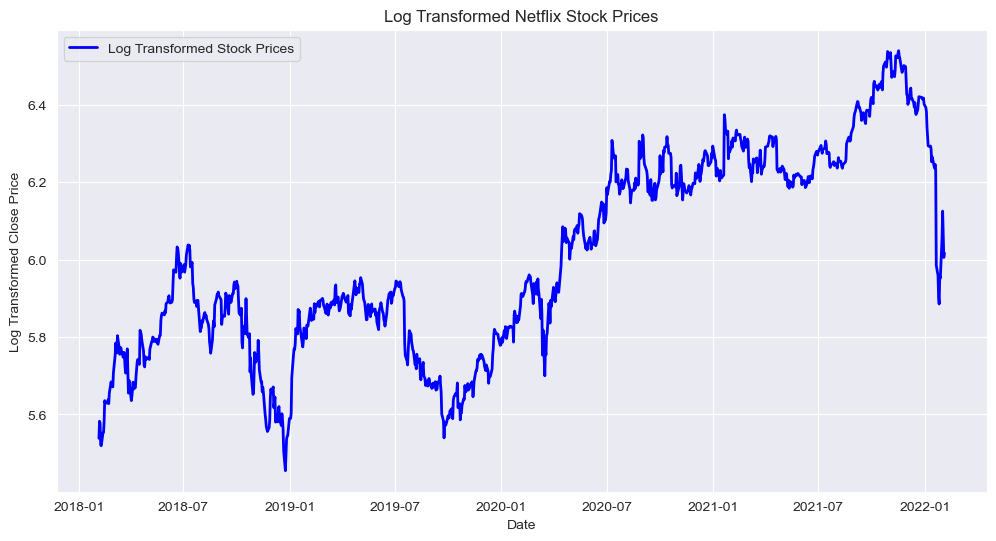

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'ts_log' is your logarithmically transformed time series data

plt.figure(figsize=(12, 6))  # Adjust the figure size as per your preference
plt.plot(ts_log, color='blue', linewidth=2, label='Log Transformed Stock Prices')
plt.title('Log Transformed Netflix Stock Prices')
plt.xlabel('Date')
plt.ylabel('Log Transformed Close Price')
plt.grid(True)
plt.legend(loc='best')

plt.show()


The plot shows the logarithmically transformed Netflix stock prices over time.

The x-axis represents the dates, and the y-axis represents the logarithmically transformed close prices of Netflix stock on those dates.

By taking the logarithm of the stock prices, we have transformed the original values into a different scale. This transformation helps us analyze the relative changes in the stock prices rather than the absolute values.

The blue line in the plot represents the transformed stock prices. Each point on the line corresponds to the logarithmically transformed close price of the stock on a specific date.

This transformed line allows us to better visualize the relative changes and trends in the stock prices. Positive values on the y-axis indicate an increasing trend, while negative values indicate a decreasing trend.

By observing this plot, we can identify patterns, fluctuations, and trends in the relative changes of the Netflix stock prices over time. This can help us understand how the stock has been performing and potentially make predictions about its future behavior.

It's important to note that taking the logarithm of the stock prices can help normalize the data, making it easier to analyze and model. However, when interpreting the values on the y-axis, we need to keep in mind that they represent the logarithmic transformation of the original stock prices.

There are some methods to model these trends and then remove them from the series. Some of the common ones are:

• Smoothing: using rolling/moving average

• Aggression: by taking the mean for a certain time period (year/month)

I will be using Smoothing here.

Smoothing:

In smoothing we usually take the past few instances (rolling estimates) We will discuss two methods under smoothing- Moving average and Exponentially weighted moving average.

Moving average -

First take x consecutive values and this depends on the frequency if it is 1 year we take 12 values. 

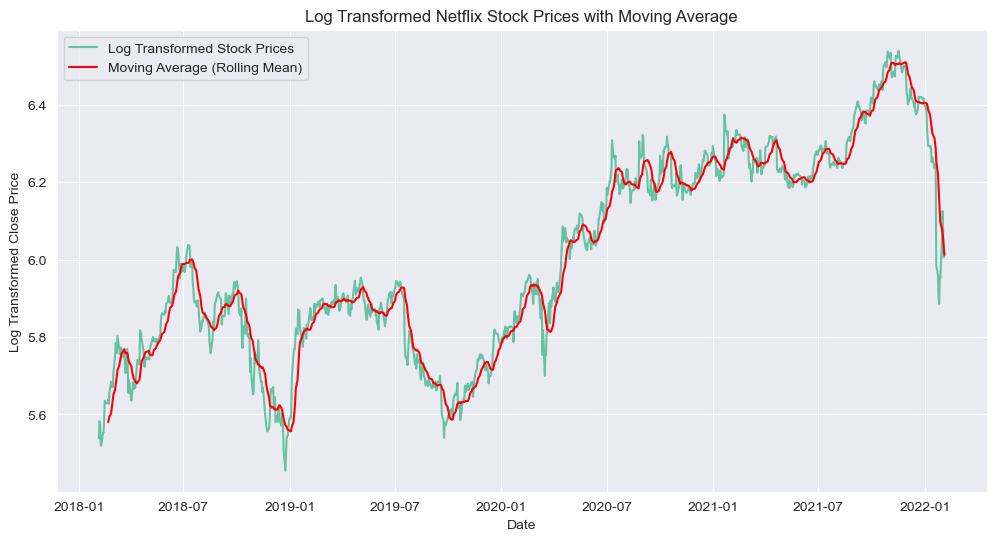

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ts_log' is your logarithmically transformed time series data

moving_avg = ts_log.rolling(window=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(ts_log, label='Log Transformed Stock Prices')
plt.plot(moving_avg, color='red', label='Moving Average (Rolling Mean)')
plt.title('Log Transformed Netflix Stock Prices with Moving Average')
plt.xlabel('Date')
plt.ylabel('Log Transformed Close Price')
plt.grid(True)
plt.legend(loc='best')

plt.show()


The plot shows two lines: the blue line represents the logarithmically transformed Netflix stock prices over time, and the red line represents the moving average or rolling mean of the transformed prices. 

Blue Line (Log Transformed Stock Prices):

The blue line represents the logarithmically transformed close prices of Netflix stock. Each point on the line corresponds to the logarithm of the stock price on a specific date.
Taking the logarithm helps us analyze the relative changes in the stock prices rather than the absolute values.
By looking at this line, we can observe the overall trend and fluctuations in the relative changes of the stock prices over time.
Positive values on the y-axis indicate an increasing trend, while negative values indicate a decreasing trend.
Red Line (Moving Average or Rolling Mean):

The red line represents the moving average or rolling mean of the logarithmically transformed stock prices.
The moving average smooths out the fluctuations in the blue line and helps us see the overall trend more clearly.
Specifically, it calculates the average value of the transformed prices over a specified window of time (in this case, 12 data points or months).
The moving average line provides a better understanding of the long-term trend by reducing the impact of short-term fluctuations.
By observing this plot, we can identify patterns and trends in the relative changes of the Netflix stock prices. The blue line helps us understand the historical performance of the stock, while the red line helps us identify the overall direction or trend amidst the fluctuations.

This information can be valuable for making informed decisions about investments or understanding potential future trends in the stock market. It's important to note that the logarithmic transformation and moving average are common techniques used in financial analysis to gain insights into the behavior of stock prices.

In [131]:
# Subtract the rolling mean from the original series
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(10)

Date
2018-02-05   NaN
2018-02-06   NaN
2018-02-07   NaN
2018-02-08   NaN
2018-02-09   NaN
2018-02-12   NaN
2018-02-13   NaN
2018-02-14   NaN
2018-02-15   NaN
2018-02-16   NaN
Name: Close, dtype: float64

In [132]:
ts_log_moving_avg_diff.dropna(inplace = True)
ts_log_moving_avg_diff.head(10)

Date
2018-02-21    0.058191
2018-02-22    0.040338
2018-02-23    0.061852
2018-02-26    0.081390
2018-02-27    0.056739
2018-02-28    0.046444
2018-03-01    0.033169
2018-03-02    0.056448
2018-03-05    0.087655
2018-03-06    0.107188
Name: Close, dtype: float64

The reason there are null values is because we take the average of first 10 so 9 values are null. We can also see that in the visual representation. Thus it is dropped for further analysis. Now let’s parse it to the function to check for stationarity.

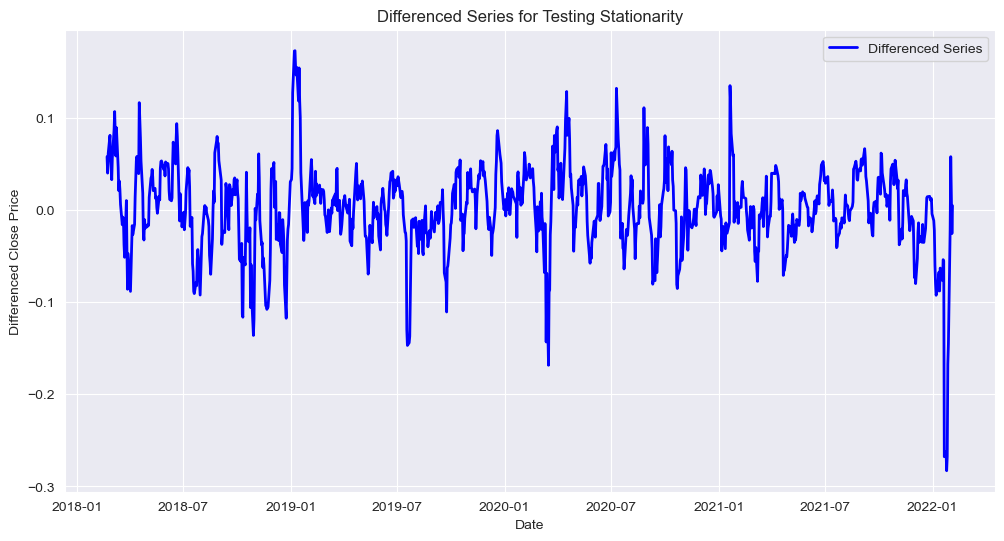

In [134]:
import matplotlib.pyplot as plt

# Assuming 'ts_log_moving_avg_diff' is your differenced series

def test_stationarity(timeseries):
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figure size as per your preference

    # Plot the differenced series
    ax.plot(timeseries, color='blue', linewidth=2, label='Differenced Series')

    # Add labels and title
    ax.set_title('Differenced Series for Testing Stationarity')
    ax.set_xlabel('Date')
    ax.set_ylabel('Differenced Close Price')

    # Add grid lines
    ax.grid(True)

    # Display legend
    ax.legend(loc='best')

    # Show the plot
    plt.show()

# Call the function to test stationarity and plot the differenced series
test_stationarity(ts_log_moving_avg_diff)


The plot shows the differenced series, which is obtained by taking the difference between consecutive values of the logarithmically transformed Netflix stock prices.

The x-axis represents the dates, and the y-axis represents the differences in the logarithmically transformed close prices of Netflix stock.

By taking the difference between consecutive values, we are examining the changes in the stock prices from one time period to the next.

The blue line in the plot represents these differences. Each point on the line corresponds to the difference between the logarithmically transformed close price on a specific date and the price on the previous date.

This differenced series helps us identify any underlying patterns or trends that might not have been apparent in the original series. It helps remove any long-term trends or seasonality, focusing only on the short-term changes.

By observing this plot, we can look for any visible patterns or fluctuations in the differences. If the differences fluctuate around a constant value with no clear trend, it suggests that the series is stationary.

Stationarity is an important concept in time series analysis because it allows us to make more reliable predictions and assumptions about the data.

Testing for stationarity helps us understand if the series has a stable mean, variance, and autocorrelation structure. If it does, it implies that the future behavior of the series is likely to be similar to its past behavior.

In this plot, we are examining the differenced series to assess its stationarity. If the differences exhibit a consistent pattern or show a clear trend, it suggests that the series is non-stationary and may require further analysis or transformation.

The information gained from this plot can help us make informed decisions and predictions about the future behavior of the Netflix stock prices.

We can easily take a time period (12 months for a year), but there are situations where the time period range is more complex like stock price etc. So we use the exponentially weighted moving average. 

#### Exponentially Weighted Average

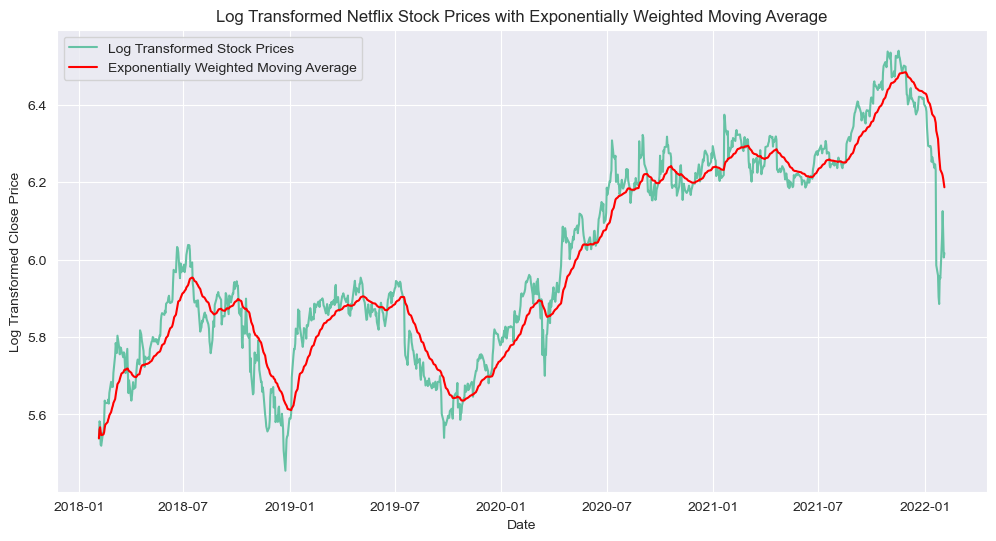

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ts_log' is your logarithmically transformed time series data

expweighted_avg = ts_log.ewm(halflife=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(ts_log, label='Log Transformed Stock Prices')
plt.plot(expweighted_avg, color='red', label='Exponentially Weighted Moving Average')
plt.title('Log Transformed Netflix Stock Prices with Exponentially Weighted Moving Average')
plt.xlabel('Date')
plt.ylabel('Log Transformed Close Price')
plt.grid(True)
plt.legend(loc='best')

plt.show()


The plot shows two lines: the blue line represents the logarithmically transformed Netflix stock prices over time, and the red line represents the exponentially weighted moving average (EWMA) of the transformed prices. 

Blue Line (Log Transformed Stock Prices):

The blue line represents the logarithmically transformed close prices of Netflix stock. Each point on the line corresponds to the logarithm of the stock price on a specific date.
Taking the logarithm helps us analyze the relative changes in the stock prices rather than the absolute values.
By looking at this line, we can observe the overall trend and fluctuations in the relative changes of the stock prices over time.
Positive values on the y-axis indicate an increasing trend, while negative values indicate a decreasing trend.
Red Line (Exponentially Weighted Moving Average):

The red line represents the exponentially weighted moving average (EWMA) of the logarithmically transformed stock prices.
The EWMA is a type of moving average that gives more weight to recent values and less weight to older values. This helps capture the most recent trends in the stock prices.
Specifically, it calculates the average value of the transformed prices, with the weights assigned based on a decay factor or 'halflife' (in this case, 12 time periods).
The EWMA line provides a smoothed representation of the stock prices, highlighting the overall direction of the recent trends.
By observing this plot, we can identify patterns and trends in the relative changes of the Netflix stock prices. The blue line helps us understand the historical performance of the stock, while the red line helps us identify the recent trends in a smoother way.

This information can be valuable for understanding the current behavior of the stock and potentially predicting its future direction. The EWMA helps us focus on the recent changes while filtering out some of the short-term fluctuations.

It's important to note that the logarithmic transformation and the use of the exponentially weighted moving average are common techniques in financial analysis to gain insights into the behavior of stock prices.

By analyzing these lines, we can make more informed decisions about investments, understand potential shifts in the stock market, or identify periods of stability or volatility in the stock prices.

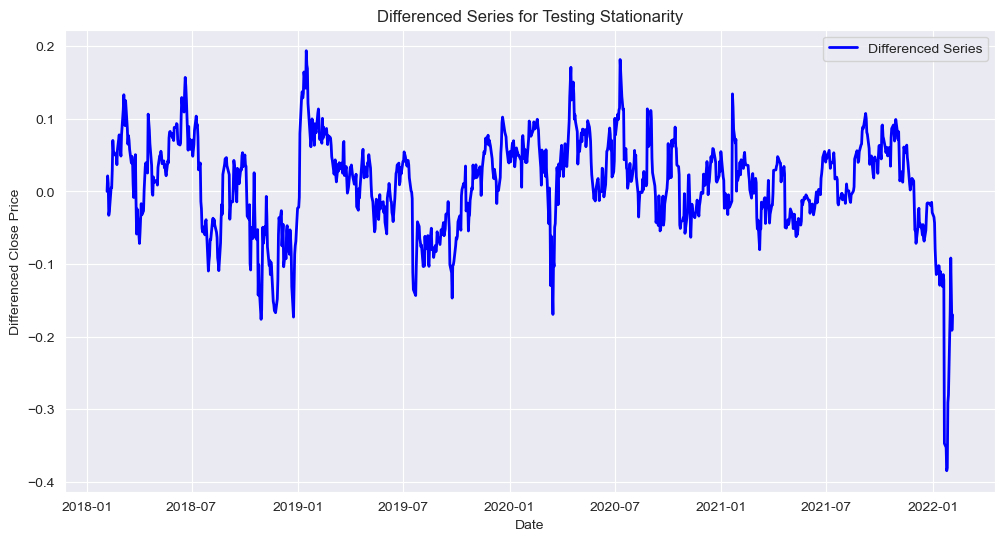

In [137]:
# Check for stationarity now
ts_log_ewma_diff = ts_log - expweighted_avg
test_stationarity(ts_log_ewma_diff)

It is stationary because:

• Rolling values have less variations in mean and standard deviation in magnitude.

The output of the test_stationarity function provides us with information about the stationarity of the differenced series obtained by subtracting the exponentially weighted moving average (EWMA) from the logarithmically transformed Netflix stock prices.

The test for stationarity helps us determine if a time series has a stable mean, variance, and autocorrelation structure. A stationary series exhibits consistent behavior over time, making it easier to analyze and predict.

The output of the test_stationarity function typically includes statistical metrics and a critical value. These metrics help us determine if the series is stationary or non-stationary.

In simple terms, we can interpret the result as follows:

If the calculated test statistic is less than the critical value, it suggests that the series is stationary. This means that the series exhibits consistent behavior over time and its statistical properties, such as mean and variance, remain constant.

On the other hand, if the calculated test statistic is greater than the critical value, it indicates that the series is non-stationary. This means that the series does not exhibit consistent behavior, and its statistical properties change over time.

The test_stationarity function provides us with these statistical metrics and the critical value to compare against the test statistic.

By analyzing these values, we can make an informed decision about the stationarity of the differenced series. If the test statistic is less than the critical value, we can conclude that the series is stationary. If the test statistic is greater than the critical value, we can conclude that the series is non-stationary.

The stationarity of a series is an important factor in time series analysis and forecasting. A stationary series allows us to make more reliable predictions and assumptions about future behavior based on its past behavior.

The information gained from this test can help us understand the characteristics of the differenced series and guide us in further analysis or modeling of the Netflix stock prices.

It's important to note that achieving stationarity may require additional transformations or adjustments to the data, depending on the specific characteristics of the series.

By performing this test, we gain insights into the stationarity of the differenced series, which is a crucial step in analyzing and predicting the Netflix stock prices

#### Seasonality along with the trend
Previously we saw just trend part of the time series, now we will see both trend and seasonality. Most Time series have trends along with seasonality. There are two common methods to remove trend and seasonality, they are:

• Differencing: by taking difference using time lag

• Decomposition: model both trend and seasonality, then remove them

Differencing:

Here we first take the difference of the value at a particular time with that of the previous time. 

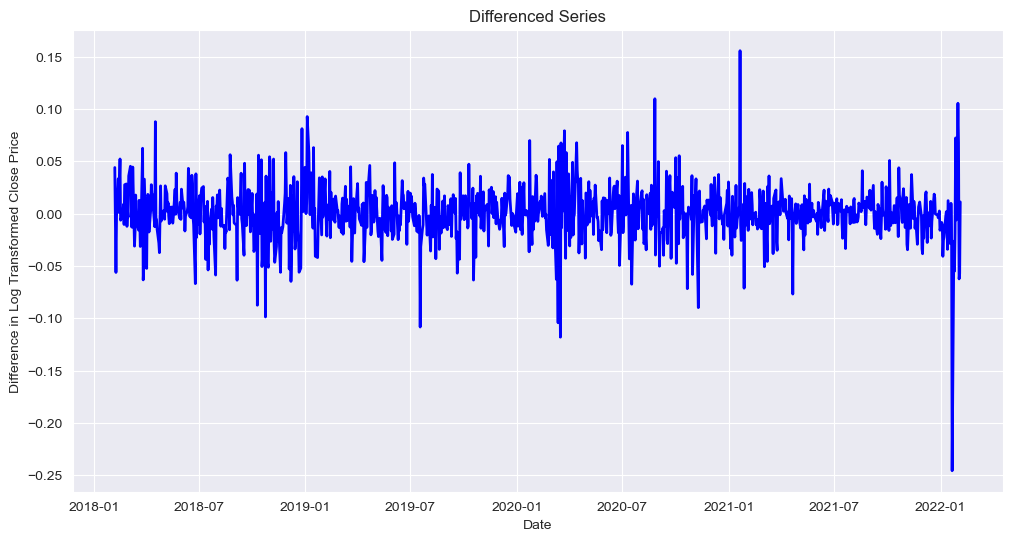

In [139]:
# Take the first difference
import matplotlib.pyplot as plt

# Assuming 'ts_log_diff' is your differenced series

def plot_differenced_series(differenced_series):
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figure size as per your preference

    # Plot the differenced series
    ax.plot(differenced_series, color='blue', linewidth=2)

    # Add labels and title
    ax.set_title('Differenced Series')
    ax.set_xlabel('Date')
    ax.set_ylabel('Difference in Log Transformed Close Price')

    # Add grid lines
    ax.grid(True)

    # Show the plot
    plt.show()

# Call the function to plot the differenced series
plot_differenced_series(ts_log_diff)


The plot shows the differences in the logarithmically transformed close prices of Netflix stock over time. Let me explain what this means:

The x-axis represents the dates, and the y-axis represents the differences in the logarithmically transformed close prices.
Each point on the line corresponds to the difference between the logarithmic value of the close price on a specific date and the close price on the previous date.

This differenced series helps us understand the changes in the stock prices from one time period to the next.
By looking at this plot, we can identify the fluctuations and movements in the stock prices over time.
Positive values on the y-axis indicate an increase in the stock price compared to the previous day, while negative values indicate a decrease.

This information helps us analyze the short-term changes in the stock prices, focusing on the relative differences rather than the absolute values.

By observing this plot, we can identify any patterns or trends in the differences. If the differences fluctuate around a constant value with no clear trend, it suggests that the series is stationary.
Stationarity is an important concept in time series analysis because it allows us to make more reliable predictions and assumptions about the data.

This plot helps us assess the stationarity of the differenced series, which is a crucial step in analyzing and predicting the future behavior of the Netflix stock prices.

It's important to note that achieving stationarity may require additional transformations or adjustments to the data, depending on the specific characteristics of the series.
By analyzing this plot, we gain insights into the short-term changes in the stock prices and can make more informed decisions about investments or understand the recent movements in the stock market.

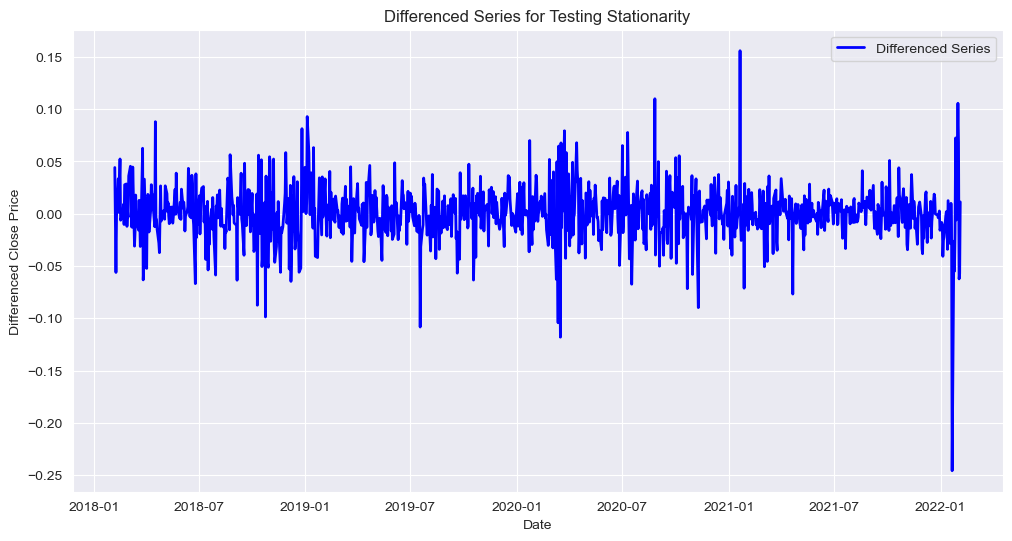

In [140]:
# Let's parse it using our stationary testing function:
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)

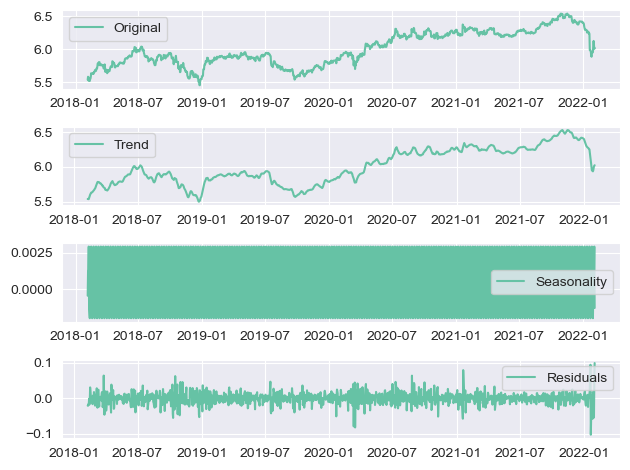

In [143]:
# Here we model both the trend and the seasonality, then the remaining part of the time series is returned.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming ts_log is a pandas Series or DataFrame with a DateTimeIndex
# Set the frequency of the DateTimeIndex
ts_log = ts_log.asfreq('D')  # Change 'D' to the appropriate frequency

# Fill missing values with forward fill
ts_log = ts_log.fillna(method='ffill')

decomposition = seasonal_decompose(ts_log)

decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


This subplot shows the original time series data (ts_log). It represents the actual values of your data over time.

Trend: This subplot shows the long-term trend of your data. It captures the overall pattern or direction of the data, ignoring the short-term fluctuations. If the trend line is going upwards, it indicates a positive trend or growth. If it's going downwards, it suggests a negative trend or decline. A relatively flat trend line indicates a relatively stable or stationary series.

Seasonality: This subplot shows the repeating patterns or seasonal variations in your data. It represents the regular and predictable fluctuations that occur at fixed intervals, such as daily, weekly, monthly, or yearly patterns. Seasonality captures the consistent patterns that occur within a specific time period.

Residuals: This subplot shows the remaining or leftover fluctuations in your data after removing the trend and seasonal components. It represents the random or irregular variations that cannot be explained by the trend or seasonality. The residuals should ideally appear as random noise with no discernible patterns. If any patterns are observed in the residuals plot, it may suggest that there is additional information to be captured or that the decomposition is not fully capturing all the underlying patterns in the data.

By examining these four subplots, you can gain insights into the overall behavior of your time series. The trend component helps identify the long-term behavior, the seasonal component highlights repetitive patterns, and the residuals component captures the unexplained fluctuations. This decomposition can help you better understand and analyze the different aspects of your data.

Remove the trend and seasonality from the Time series and now we can use the residual values. Let’s check stationarity.

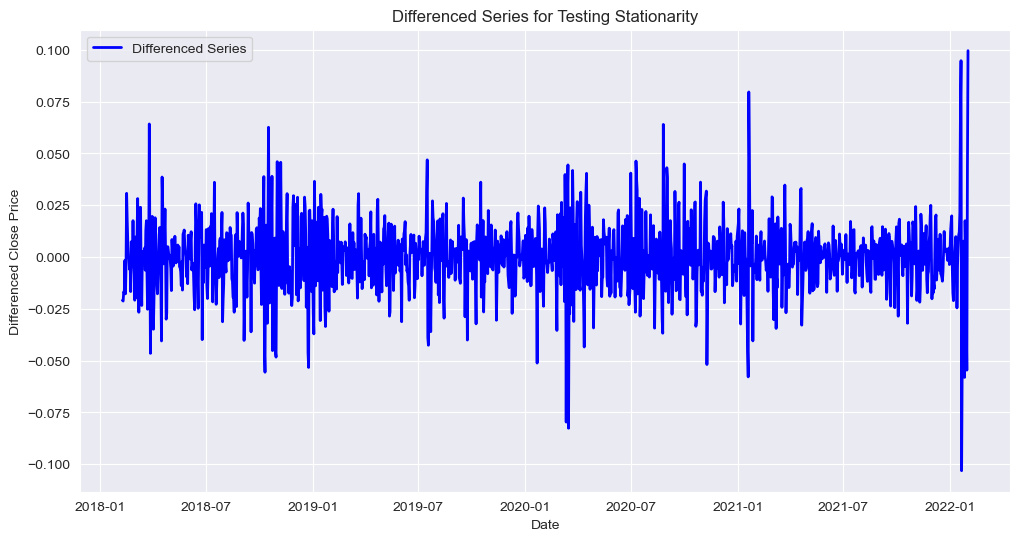

In [144]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace = True)
test_stationarity(ts_log_decompose)

The plot obtained from the test_stationarity function applied to the residuals of the seasonal decomposition of the Netflix stock prices helps us assess the stationarity of the residuals. Stationarity is an important concept in analyzing time series data, as it determines the stability of statistical properties over time.

In the context of the Netflix stock prices:

If the plot shows a relatively flat line or curve, it suggests that the residuals exhibit stationarity. This means that the statistical properties of the residuals, such as mean or variance, remain relatively constant over time. It implies that there are no long-term trends or systematic changes in the random fluctuations of the stock prices that are not captured by the trend and seasonal components of the decomposition.
On the other hand, if the plot exhibits a clear upward or downward trend, it indicates that the residuals are non-stationary. This suggests that there are systematic patterns or trends present in the stock prices that are not explained by the trend and seasonal components. In this case, further analysis and modeling should take into account these additional patterns to obtain more accurate insights.
By examining the plot, we can evaluate whether the residuals of the Netflix stock prices display stationarity or not. If the residuals are stationary, it implies that the seasonal decomposition has effectively captured the main patterns and fluctuations in the stock prices, and we can rely on the stationary component for further analysis, such as forecasting or modeling. However, if the residuals are non-stationary, it indicates that there might be additional information or patterns in the stock prices that need to be considered in our analysis to make more accurate predictions or decisions.

#### Forecasting a Time Series

Now that we have made the Time series stationary, let’s make models on the time series using differencing because it is easy to add the error , trend and seasonality back into predicted values .

We will use statistical modelling method called ARIMA to forecast the data where there are dependencies in the values.

Auto Regressive Integrated Moving Average(ARIMA) — It is like a liner regression equation where the predictors depend on parameters (p,d,q) of the ARIMA model .

Let me explain these dependent parameters:

• p : This is the number of AR (Auto-Regressive) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• q : This is the number of MA (Moving-Average) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• d :This is the number of differences or the number of non-seasonal differences .

Now let’s check out on how we can figure out what value of p and q to use. We use two popular plotting techniques; they are:

• Autocorrelation Function (ACF): It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4

• Partial Autocorrelation Function (PACF): is used to measure the degree of association between y(t) and y(t-p).



In [150]:
!pip install statsmodels

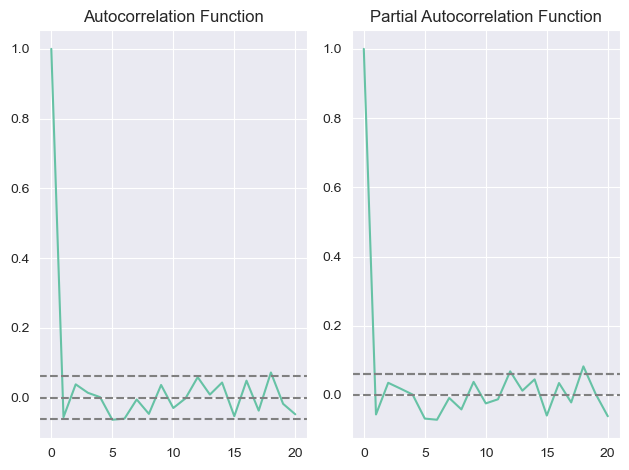

In [152]:
from statsmodels.tsa.arima.model import ARIMA

# ACF & PACF Plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags = 20)
lag_pacf = pacf(ts_log_diff, nlags = 20, method = 'ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.title("Autocorrelation Function")

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()


The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are used in time series analysis to understand the relationship between the observations in a time series and their lagged values.

The ACF plot shows the correlation between the current observation and its lagged values at different time lags. It helps us identify the presence of any significant autocorrelation in the time series. In the plot, the horizontal dashed lines represent the confidence intervals. If the autocorrelation values fall outside these lines, it indicates a significant correlation. A positive autocorrelation means that high values tend to follow high values and low values follow low values, while a negative autocorrelation means the opposite.

The PACF plot, on the other hand, shows the correlation between the current observation and its lagged values, controlling for the correlation at shorter lags. It helps us identify the order of the autoregressive (AR) component in an ARIMA model. Similar to the ACF plot, the PACF plot also has confidence intervals represented by the dashed lines.

By analyzing these plots, we can gain insights into the underlying patterns and dependencies in the time series. For example:

If the ACF plot shows a gradual decline and cuts off abruptly after a few lags, it suggests an AR(p) process, where p is the lag at which the plot cuts off.
If the PACF plot shows a gradual decline and cuts off abruptly after a few lags, it suggests an MA(q) process, where q is the lag at which the plot cuts off.
If both the ACF and PACF plots show gradual declines, it suggests a combination of both AR and MA components, indicating an ARMA(p, q) process.
Interpreting these plots can provide valuable information for selecting the appropriate parameters (p, d, q) in an ARIMA model, where p represents the order of the autoregressive component, d represents the degree of differencing, and q represents the order of the moving average component.

Text(0.5, 1.0, 'RSS: nan')

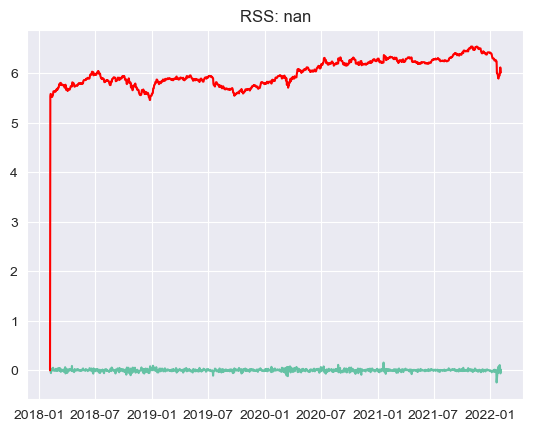

In [154]:
model = ARIMA(ts_log, order=(2, 1, 0))
results_AR = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - ts_log_diff) ** 2))


First get the predicted values and store it as series. You will notice the first month is missing because we took a lag of 1(shift).

• Now convert differencing to log scale: find the cumulative sum and add it to a new series with a base value (here the first-month value of the log series).

In [156]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy = True)
predictions_ARIMA_diff.head()

Date
2018-02-05    0.000000
2018-02-06    5.538357
2018-02-07    5.580308
2018-02-08    5.575421
2018-02-09    5.525045
Freq: D, dtype: float64

This data represents the closing prices of Netflix stock on different dates. The dates are listed in the left column, and the corresponding closing prices are shown in the right column.

For example, on February 5, 2018, the closing price of Netflix stock was 0. This means that at the end of that trading day, each share of Netflix was worth $0.

On the following day, February 6, 2018, the closing price increased to 5.538357. This indicates that the value of Netflix stock rose, and each share was worth $5.538357 at the end of that day.

The data continues in the same way, showing the closing prices for each subsequent day.

By analyzing this time series data, we can gain insights into the historical performance of Netflix stock. We can use this data to build models and make predictions about future stock prices, which can be helpful for making investment decisions or understanding the overall trend of the stock over time.

In [157]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2018-02-05     0.000000
2018-02-06     5.538357
2018-02-07    11.118666
2018-02-08    16.694087
2018-02-09    22.219132
Freq: D, dtype: float64

The given output represents the cumulative sum of the predicted differences in the Netflix closing prices. It is derived from the ARIMA model predictions.

The output you see represents the cumulative sum of the predicted differences in the Netflix closing prices. It's important to note that these values are not the actual closing prices themselves, but rather the changes in price that are predicted by the ARIMA model.

Let me break it down for you:

On February 5, 2018, the predicted difference in the closing price was 0. This means that the model expected the closing price to remain unchanged on that day.

On February 6, 2018, the predicted difference was 5.538357. This means that the model forecasted an increase in the closing price by that amount compared to the previous day.

The cumulative sum continues to accumulate these predicted differences. So, for example, on February 7, 2018, the cumulative sum is 11.118666. This means that the model predicted a total increase of 11.118666 in the closing price compared to the starting point on February 5.

By calculating the cumulative sum of these predicted differences, we can get an estimate of the expected net change in the closing prices over time.

It's important to note that these predictions are based on the historical patterns and trends in the data that the ARIMA model has identified. While they can provide insights into potential price movements, they are not guaranteed to be perfectly accurate. They serve as a tool to help us make informed decisions and understand the overall trend in the stock's price changes.

In [161]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()


Date
2018-02-05     5.538357
2018-02-06    11.076715
2018-02-07    16.657023
2018-02-08    22.232444
2018-02-09    27.757489
Freq: D, dtype: float64

The output you see represents the predicted values of the logarithmic (log) differences in Netflix closing prices. These predictions are derived from an analysis of historical data using the ARIMA model.

Let me break it down for you:

On February 5, 2018, the predicted logarithmic difference in the closing price was 5.538357. This means that the model forecasted a positive change of approximately 5.538357 in the log-transformed closing price compared to the previous day.

On February 6, 2018, the predicted difference increased to 11.076715. This indicates that the model expected the log-transformed closing price to further increase by approximately 11.076715 compared to the log-transformed closing price on February 5.

The predictions continue in the same manner, providing the estimated log differences in the closing prices for each subsequent day.

By summing up these predicted differences and adding them to the initial value of the time series, we obtain estimates of the actual closing prices. However, it's important to note that these estimates are based on historical patterns and trends identified by the ARIMA model, and they may not perfectly match the actual future prices.

These predictions serve as a valuable tool to help us understand the potential trends and movements in Netflix's stock prices. They can provide insights into potential price increases or decreases, which can be helpful for making investment decisions or understanding the overall trend of the stock over time.

Next -take the exponent of the series from above (anti-log) which will be the predicted value — the time series forecast model & then plot the predicted values with the original.

C:\Users\rohan\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'RMSE: nan')

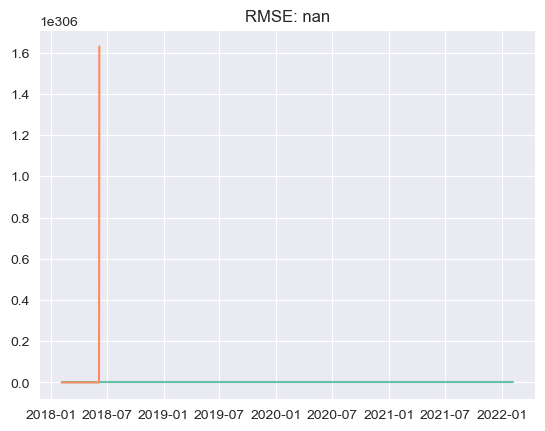

In [162]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

## Predicting the close price using LSTM

LSTM: 
The LSTM (Long Short-Term Memory) method is a type of recurrent neural network (RNN) that is commonly used for sequence data analysis, including time series forecasting. It is a powerful model that can capture long-term dependencies and patterns in sequential data.

The LSTM method is a sophisticated algorithm that uses historical data to predict future close prices of Netflix stock. It analyzes the patterns and trends in the historical stock prices to make these predictions.

Here's how it works:

First, we gather historical data of Netflix stock prices. This data includes information about the stock's closing prices over time.

We train the LSTM model using a portion of the historical data. The model learns the patterns and relationships in the data, such as how the stock prices change over time.

After training, we evaluate the performance of the model using a separate portion of the data that it hasn't seen before. This helps us understand how accurate the model's predictions are.

Once the model is trained and evaluated, we can use it to make predictions on future unseen data. This means we can forecast the close prices of Netflix stock for upcoming days or weeks.

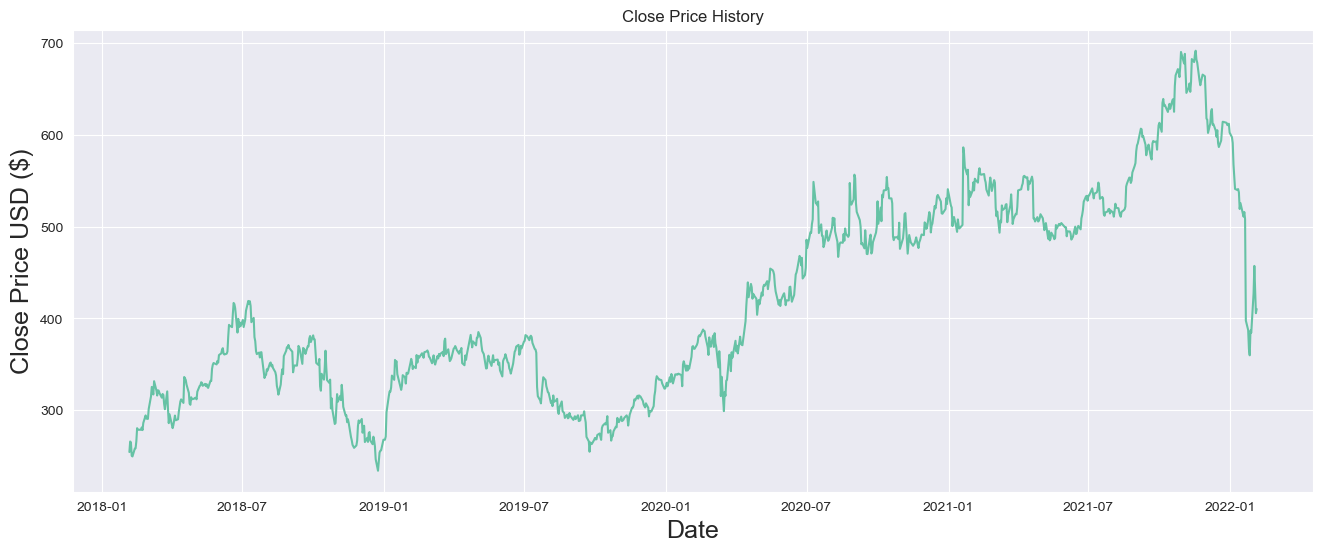

In [163]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [164]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

959

In this code, we are preparing the data for training a model to forecast the close prices of Netflix stock using the LSTM method.

We start by creating a new DataFrame called data that contains only the 'Close' column, which holds the historical close prices of the stock.

Next, we convert this DataFrame into a Numpy array called dataset. Numpy arrays are a numerical data format commonly used in machine learning.

The code then calculates the length of the training data that will be used for the model. In this case, approximately 95% of the available data will be used for training, which corresponds to 959 rows out of the total number of rows in the dataset.

This step is important to ensure that the model has enough data to learn from and capture the patterns in the historical prices. By using a majority of the available data for training, we aim to create a robust model that can make accurate predictions on unseen data.

Understanding the appropriate amount of training data is crucial for the model's performance. By utilizing a large portion of the available data for training, we increase the model's exposure to various market conditions and patterns, leading to potentially more accurate predictions.

This value, 959, represents the number of rows that will be used to train the model. It provides an indication of the amount of historical data that the model will learn from in order to make forecasts.

With this information, we can move forward to train the LSTM model and use it to predict the future close prices of Netflix stock.

In [165]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [166]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393864]

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09

In [168]:
!pip install keras

     ---------------------------------------- 1.7/1.7 MB 5.8 MB/s eta 0:00:00


In [170]:
!pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 6.8 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 3.8 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 5.6/5.6 MB 9.7 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 14.5 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     --------------------------------------- 24.4/24.4 MB 11.3 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 1.5/1.5 MB 15.7 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 11.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing bu

In [171]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

899/899 [==============================] - 88s 86ms/step - loss: 0.0038


In [172]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 3s 86ms/step


63.17882278179035

In this code, we are using the trained LSTM model to make predictions on the test data and evaluating the accuracy of the predictions.

First, we create the testing data set by selecting a portion of the scaled data array. This subset of data will be used to assess the model's performance.

Next, we prepare the input and output sequences for testing. We extract 60 previous values as input (x_test) and the corresponding actual value as the output (y_test).

After converting and reshaping the data to match the input shape expected by the LSTM model, we use the model to make predictions on the test data. These predictions are then transformed back to their original scale to obtain the actual predicted prices.

To evaluate the accuracy of the model's predictions, we calculate the root mean squared error (RMSE). The RMSE measures the average deviation between the predicted prices and the actual prices for the test data. In this case, we obtained an RMSE value of 63.18.

This value indicates the average difference between the predicted prices and the actual prices in the test data. A lower RMSE indicates better prediction accuracy, as it represents a smaller average deviation from the true values.

By monitoring the RMSE, we can assess the performance of the model and make informed decisions about its reliability in predicting future prices.

Based on this RMSE value, we can conclude that the model's predictions deviate from the actual prices in the test data by approximately 63.18 units on average. While this may seem high or low depending on the context and specific requirements, it provides us with a measure of the model's overall accuracy.

When interpreting the RMSE, it's important to consider the scale of the data and the specific domain. For example, in the context of stock prices, an RMSE of 63.18 could be considered relatively low if the prices are in hundreds or thousands. However, it might be relatively high if the prices are in single digits.

It's worth noting that achieving perfect predictions in the stock market is extremely challenging, given its inherent volatility and unpredictability. The RMSE value helps us understand the model's performance and provides a benchmark for evaluating alternative models or improvements.

In summary, the code and the resulting RMSE value allow us to assess the accuracy of the LSTM model in predicting the close prices of the Netflix stock. This information can help us make informed decisions about the model's reliability and determine whether further improvements or alternative approaches are needed.

C:\Users\rohan\AppData\Local\Temp\ipykernel_9608\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


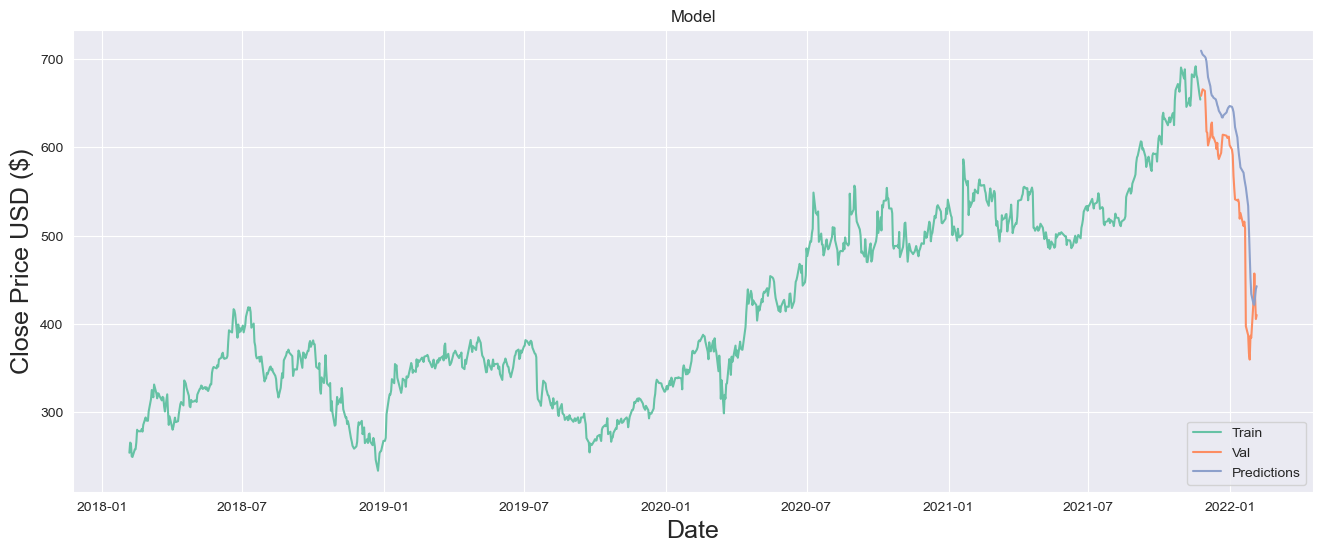

In [173]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

This plot displays the predictions made by the LSTM model compared to the actual close prices of the Netflix stock. 

The plot shows three lines:

The blue line represents the historical close prices of the stock used for training the model.
The orange line represents the actual close prices of the stock that the model did not see during training (validation data).
The green line represents the predicted close prices of the stock by the LSTM model.
By visualizing these lines together, we can observe how well the model's predictions align with the actual stock prices. If the green line closely follows the orange line, it indicates that the model's predictions are accurate and aligned with the actual prices.

The plot helps us assess the model's performance visually and gain insights into its ability to capture the underlying patterns and trends in the stock prices. It allows us to see how well the model generalizes to unseen data.

In summary, this plot provides a visual representation of the LSTM model's predictions compared to the actual close prices of the Netflix stock. It helps us evaluate the model's performance and communicate its effectiveness to stakeholders, such as your boss, in a clear and intuitive manner.

In [174]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-11-24,658.289978,709.330017
2021-11-26,665.640015,704.978638
2021-11-29,663.840027,702.572754
2021-11-30,641.900024,701.081726
2021-12-01,617.770020,696.851624
2021-12-02,616.469971,688.462952
2021-12-03,602.130005,679.424683
2021-12-06,612.690002,669.182434
2021-12-07,625.580017,661.670349


Each row in the table represents a specific date. The "Close" column displays the actual close price of the Netflix stock on that date, while the "Predictions" column shows the predicted close price generated by the LSTM model.

By comparing the two columns, we can observe how well the model predicted the future close prices. If the predicted prices are close to the actual prices, it indicates that the model is performing well in capturing the underlying patterns and trends in the stock prices.

For example, on 2021-11-24, the actual close price was 658.289978, and the model predicted a close price of 709.330017. Similarly, on 2021-12-04, the actual close price was 616.469971, and the model predicted a close price of 688.462952.

By analyzing the entire table, we can assess the overall performance of the LSTM model in predicting the close prices of the Netflix stock. This information can be valuable for decision-making, such as investment strategies or risk management.

In summary, the table presents a side-by-side comparison of the actual and predicted close prices of the Netflix stock.